# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short

# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/canada/melita_man/dat.txt" # 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" 

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

# uipath = unicode(ipath , "utf8")
uipath = ipath

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


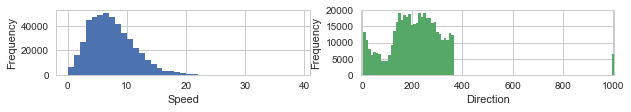

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  4.703340e+05  470334.000000  470334.000000  470334.000000   
mean   2.000300e+07    1153.105529     205.386744       7.283531   
std    1.127487e+05     669.378092     128.859325       3.840740   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.990101e+07     600.000000     130.000000       4.600000   
50%    2.002061e+07    1120.000000     200.000000       6.700000   
75%    2.011052e+07    1700.000000     270.000000       9.800000   
max    2.015123e+07    2350.000000     999.000000      38.600000   

               month   dir_windrose  
count  470334.000000  470334.000000  
mean        6.562462     205.010760  
std         3.449571     133.522418  
min         1.000000       0.000000  
25%         4.000000     140.000000  
50%         7.000000     200.000000  
75%        10.000000     270.000000  
max        12.000000     999.000000

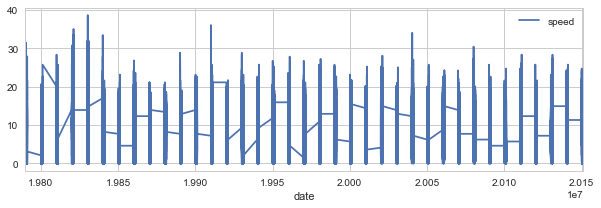

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


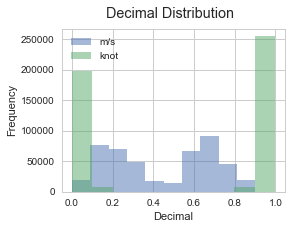

In [7]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

# knot_unit = False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

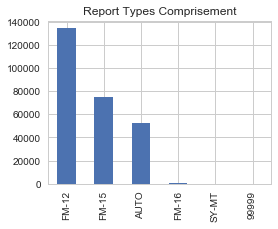

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

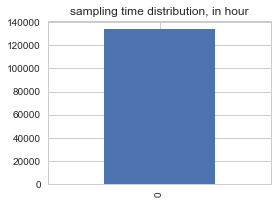

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0       12808
100     12822
200     12815
300     12886
400     12847
500     12821
600     12879
700     12630
800     12191
900     11708
1000    11228
1100    11225
1200    11571
1300    11792
1400    12068
1500    12481
1600    12625
1700    12713
1800    12844
1900    12798
2000    12803
2100    12909
2200    12834
2300    12834
Name: HrMn, dtype: int64

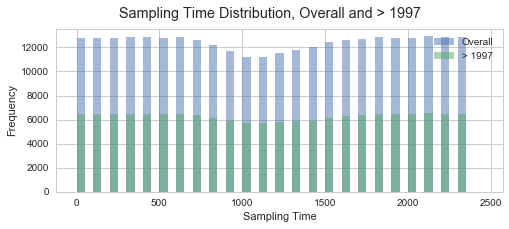

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
120455  19910103   600  FM-12  200     70         N      1           250   
253470  20040421  1100  FM-12  290     66         N      4           160   
44291   19831018  1400  FM-12  210     61         N     10           240   
3032    19790509   100  FM-12  140     61         N      5           310   
97226   19890213  1500  FM-12  160     56         N      2           290   
146657  19930121  2100  FM-12  180     56         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
3702    19790606   400  FM-12  250     55         N      6           200   
18751   19810227   400  FM-12  320     55         N      2           130   
146499  19930117   500  FM-12  180     55         N      1           270   

         decimal  incre  incre_reverse  
120455  0.978420   44.0           46.0  
253470  0.090730   33.0           32.0  
44291   0.036733   31.0           24.0  
3032    0.036733   45.0           48.0  
97226   0.982736    6.0            6.0  
146657  0.982736    8.0            6.0  
367283  0.010814    3.0            6.0  
3702    0.010814   49.0           48.0  
18751   0.010814   19.0           22.0  
146499  0.010814   12.0            3.0

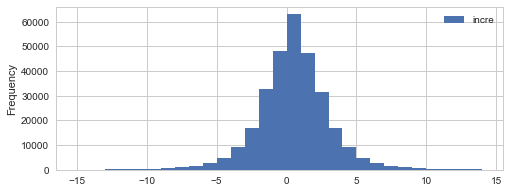

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 22


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
146657  19930121  2100  FM-12  180     56         N      1           270   
97226   19890213  1500  FM-12  160     56         N      2           290   
146499  19930117   500  FM-12  180     55         N      1           270   
367283  20111208  1400  FM-12  180     55         N     12           270   
18751   19810227   400  FM-12  320     55         N      2           130   
47032   19840121  1900  FM-12  310     54         N      1           140   
8326    19791217   100  FM-12  210     54         N     12           240   
367281  20111208  1200  FM-12  190     54         N     12           260   
8325    19791217     0  FM-12  210     53         N     12           240   
292545  20080109   500  FM-12  170     53         N      1           280   

         decimal  incre  incre_reverse  
146657  0.982736    8.0            6.0  
97226   0.982736    6.0            6.0  
146499  0.010814   12.0            3.0  
367283  0.010814    3.0            6.0  
18751   0.010814   19.0           22.0  
47032   0.038891    4.0            2.0  
8326    0.038891    1.0            2.0  
367281  0.038891    2.0            2.0  
8325    0.066969    1.0           -1.0  
292545  0.872584   13.0           15.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print(len(effective_column), SECTOR_LENGTH)

0       2844
10      2774
20      4149
30      4400
40      4500
50      3914
60      5092
70      6598
80      8572
90      8342
100     8554
110     7151
120     7541
130     6931
140     7978
150     8396
160    10301
170    10061
180    10951
190    11003
200    12180
210    11258
220    12002
230    10130
240    10149
250     9770
260    11952
270    11010
280    11943
290    10906
300    12159
310    10136
320     8728
330     5788
340     4119
350     2792
999     4033
Name: dir, dtype: int64

36 10.0


In [17]:
df=realign_direction(df, effective_column)

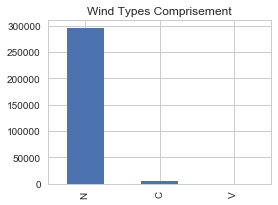

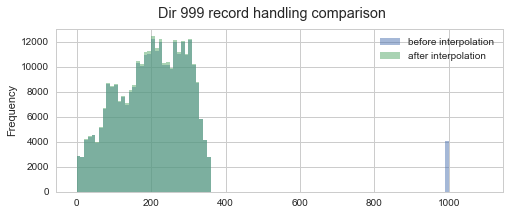

In [18]:
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.3 Time Shift Comparison

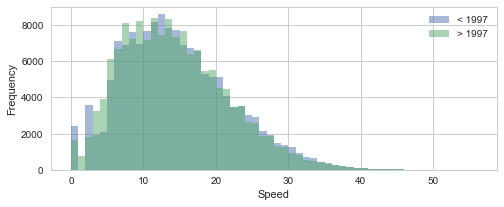

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

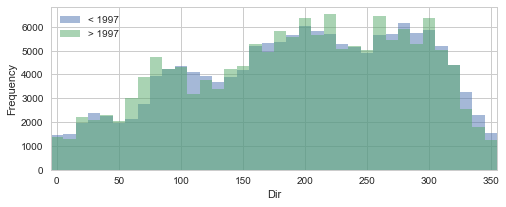

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1979 - 1979


/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


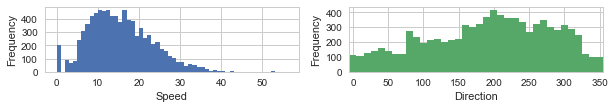

1980 - 1984


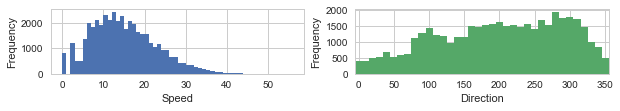

1985 - 1989


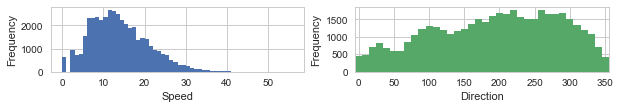

1990 - 1994


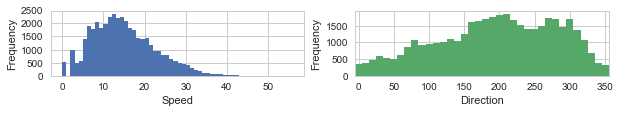

1995 - 1999


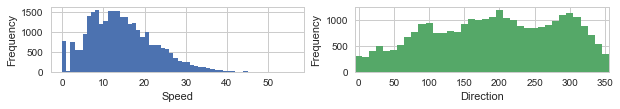

2000 - 2004


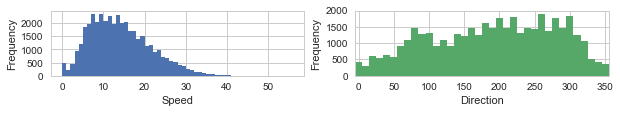

2005 - 2009


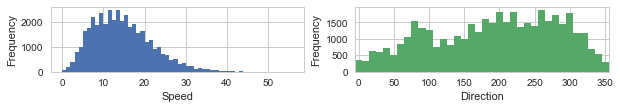

2010 - 2014


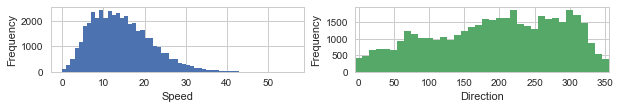

2015 - 2015


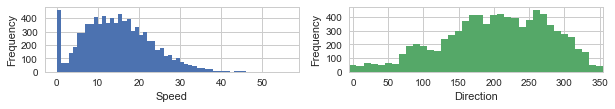

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00669354143313


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

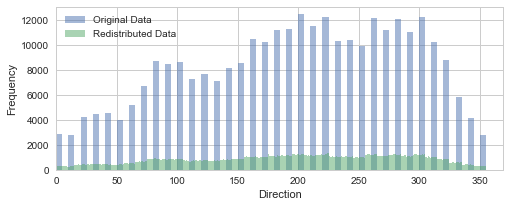

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


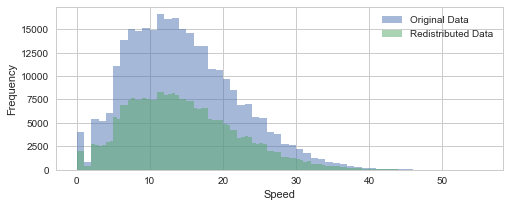

In [24]:
if delete_zero:
    redistribute_method = 'round_down'
else:
    redistribute_method = 'round_up'
df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [25]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [26]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [27]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Incre_threshold for artefact detection:', incre_threshold) 
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
print('delete_zero?', delete_zero)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: [0]
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.283700e+04  42837.000000  42837.000000  42837.000000  42837.000000   
mean   2.012072e+07   1148.978687    193.722972     14.402382      6.518150   
std    1.413668e+04    693.172819     90.993268      7.308848      3.459189   
min    2.010010e+07      0.000000     -4.985142      0.034830      1.000000   
25%    2.011040e+07    500.000000    122.593959      8.800395      4.000000   
50%    2.012070e+07   1100.000000    202.459209     13.505198      7.000000   
75%    2.013100e+07   1800.000000    270.891116     18.984736     10.000000   
max    2.014123e+07   2300.000000    354.956935     55.672828     12.000000   

       dir_windrose       decimal         incre  incre_reverse             x  \
count  42837.000000  42837.000000  42837.000000   42837.000000  42837.000000   
mean     191.330789      0.546484      0.000280      -0.000303     -2.261833   
std      102.782601      0.450140      2.535876       2.535862     10.601552   
min        0.000000      0.000000    -23.000000     -29.000000    -55.659712   
25%      130.000000      0.051839     -1.000000      -1.000000     -9.347081   
50%      200.000000      0.911451      0.000000       0.000000     -2.138310   
75%      270.000000      0.967607      1.000000       1.000000      5.015544   
max      999.000000      0.997842     29.000000      23.000000     37.256226   

                  y  
count  42837.000000  
mean      -2.887607  
std       11.619179  
min      -48.228459  
25%      -11.050030  
50%       -3.089322  
75%        5.521096  
max       37.703172

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


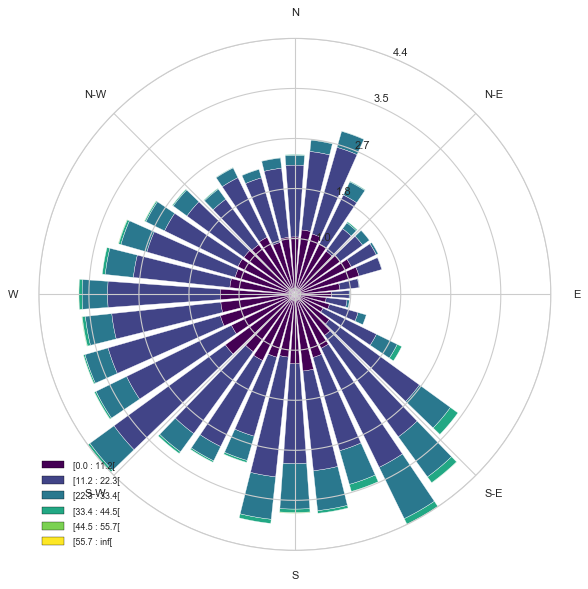

In [28]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [71]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATQAAADlCAYAAADdlAuhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzt3XtcVHX+x/HX3AQBFTFu3k2TyvCSimLeS5MgRMsurmha
tm21/XJ/urVrrkul7k8ty7XLdlMz0zJrgYTdzDIVE++EdyUvITrcBAVR5vb7Y2QEQWbQGc4wfJ6P
Bw/ne873zHkzox/P9XtUFovFghBCeAC10gGEEMJZpKAJITyGFDQhhMeQgiaE8BhS0IQQHkMKmhDC
Y2iVDuBMZrMZo9GIWq1GpVIpHUcI4UQWiwWz2YxWq0WtrnlbzKMKmtFoJDMzU+kYQggXCg8Pp0mT
JjXO86iCVlG1w8PD0Wg0tfY1mUxkZmY61FcpktE5JKNzKJ2xYv3X2zoDDytoFbuZGo3G4Q+8Ln2V
IhmdQzI6h9IZazucJCcFhBAeQwqaEMJjSEETQngMKWhCCI8hBU0I4TGkoLkhlcr6o9W699kuIdyN
FDQhhMeQgiaE8BgedWFtY1H5ukIZQF2Iq2QLTQjhMaSgCSE8huxyKkB2GYVwDSloDcz+3P0w7AsI
S4KAo4QsbEYrn1aMuX0MT939FB39OyodUQjFyC5nA3HZeJmXv3+Z7u93hyGvQUgGNLmIvlTPgbwD
zNk8h1vfvpXJiZO5cPmC0nGFUIRsoTUAJ4pOEPdlHPty99FE04Tyzc/DgYfhdASlly9zOP8wn+z5
hOUZy1m2dxnLNmyBtasgp4/s0opGRbbQ3Fz+pXzuX3k/+3L30SukF7ue3gXfvQHZkWDR4KPzoVdo
L/75wD/Z9+w+BrYfCK2OweTB0HGj0vGFqFdS0NxZ0wKeTX+WrHNZDOs4jLQpadwVdNd1u7dv0Z4f
J/0IP78IujIYH0PaqbR6DCyEsqSguS0LPDSeXy/8SkSbCBIfS6SprqndpbRqLfz3Tdj2P9CklKiV
UezL3VcPeYVQnhQ0d9X3XejyHcHewXz72Lc082pWh4VV8J9FsPNpLpRf4OEvH5YTBaJRkILmjlod
hpEzAJjdczYBTQNq7V4xOkfVodZVkLKEyLaRHC44zNTkqVjkDIHwcFLQ3IzFYoG4ydZjYNteIOKW
iBt/M7OOLx7+glZNW/HF/i/4YNcHzgsqhBuSguZm1hxYA+1+hsJb4ft/3PT7tWvRjhVjVgAwY/0M
ss9n3/R7CuGuXF7QUlNTiY6OZuTIkSxZsqTafL1eT3x8PFFRUUycOJGCggIAysrK6NWrF6NHj7b9
mEwmV8dVVLmpnL9u+Ku1sWEeGO2fBHBE1G1RPNHzCS6UX+C5lOdQqSw17KIK0fC5tKDl5eUxf/58
VqxYwbp169i5cyebN2+u0ichIYGxY8eSmppKbGwsc+bMAWD//v3079+fxMRE24+7P6/wZv1r57/I
OpcFp/vC/nFOfe+FIxYS6BNI0uEkuHOtU99bCHfh0jsF0tLS6N+/PwEB1oPacXFxpKSkMGjQIAAM
BgPp6em8/fbbtvlz587FYDCQmZmJXq9n3LhxaDQapk+fTp8+fRxaryNbchV9lNnqu1qYK9Z/4fIF
Xt30qnXi+vmAqlqf6y9vrw3+Xv68df9b/O6b38Go/4GjD4DB56Z/f2U/R8dIRudQOqMj63VpQcvN
zSUoKMjWDgoKQq/X29pFRUX4+vqi0+msYbRa/Pz8KCwsRKVSMWrUKKZOncqBAwf4/e9/T3JyMi1b
trS73szMTIcz1qWv8/S2vdq7dy8An//6OfkX8xkQOICtJ4ZW6V0947XL22tbdbV0pW+rvuxgB0S+
AZtmVZl/M5T5HOtGMjqHO2d0aUEzm83VplV+jHtN8wHUajVPPPGErd2tWzfCw8PZvXs39957r931
hoeH2909NZlMZGZmOtTXlXr27InRbGTtZutu4GujXuPa37C2jD179qxT+93Qd+n7YQQM/D/YPbXa
/Lpyl8+xNpLROZTOWLH+2ri0oIWEhLB9+3ZbOzc3l5CQEFs7ICCAkpISjEYjWq0Wo9FIaWkp/v7+
rFmzhoEDBxIaGgpYL2fQah2Lq9FoHP7A69LXFTQaDWsPreVk8Ul6h/ZmWKdhNfa5XsZrp9tr92nT
BzLioeenMOxvaDTOuZRD6c/REZLROdw5o0tPCkRGRrJt2zby8/MxGAwkJSUxdOhQ23ydTkdERATJ
yckAJCcnExERgU6nIzMzk08//RSAY8eOceDAAXr37l3Taho0i8XCo28vBGDXP6dX2YKtoNVqbuqs
ZLULb394HQze0OtjDuUfusHkQrgflxa04OBgZsyYweTJk4mJiSEsLIwRI0Ywc+ZMNmzYAMDs2bNJ
TEwkOjqaNWvWMGvWLACmTZvG8ePHiY6OZtq0acyfPx8/Pz9XxlXEllNboM0OKGpvHRKoPpxvB9v/
CGozr296vX7WKUQ9cPl4aFFRUURFRVWZVnFpBkBoaCjLli2rtlzLli15//33XR1Pcf/a9S/ri+1/
BHM9Dk+XNgP6vsOqfauYNXgWYbeE1d+6hXARuVNASd5FrD24Fkw62Dupftd9MRC2P4/ZYub1zbKV
JjyDFDQlhX/OJeMlOBxrLTD1bet0fHQ+fJ75OYfzD9f/+oVwMiloSur1ifXPPVOUWf/FQJ7r+xxm
i5kFWxcok0EIJ5KCppTgDGi9izbN2sCx+xWL8WL/F9Gpdaz4ZQVnLpxRLIcQziAFTSlXts4m9ZgE
FuWu6WndrDXx3eMpN5WzOH2xYjmEcAYpaEpQmeCuLwCY1LOeTwbUYPqA6QC8t/M9GdlWNGhS0JTQ
YRP46SHnbrq26qp0Gu4IvIMHuz5I8eViPtz9odJxhLhhUtCU0O1L65/7H1E2RyUzBliH/F6cvhiT
2X1HfBCiNlLQ6pnRbLw6HtkB5455djMGth9Ir5BenCw+SfKRZKXjCHFDpKDVs59O/AS+eXC6D5y7
Vek4NiqVihf6vQAgJwdEgyUFrZ59ud/9djcrPHbXY9zicws/nviRTL37jnklxPVIQasHFSNdGM1G
vj70tXWiGxY0b603v+/9ewC6T/2nPHdANDhS0OrRz7/9TP7FfMjpDcUdlI5Toz/0+QMalQa6fwbe
55SOI0SdSEGrR7aD7YcfVDZILdo0b0Pc7XHW54L2WKF0HCHqRApaPbIVtCPuW9DAupUGQJ/3AXna
umg4pKDVl4BjHMo/ZL1380wvpdNUU/l42bBOw6DgNgg8aL0IWIgGQgpafelq3TqL6RpD5UfUuSO1
Sg07rScH6PuesmGEqAMpaPUlzFrQHuzq3rubNnufAKMX3PE1+hK93e5CuAMpaPXBuwjab6aptinD
Ow1XOo1jylpZn96uMbA8Y7nSaYRwiBS0+tD5O9AYGdF5BE11TZVO47jdUwH4aPdHWCxyckC4Pylo
TlbtkXFgLWjAqM6jlAl1o04OgvyuHC08yqaTcnJAuD+XF7TU1FSio6MZOXIkS5YsqTZfr9cTHx9P
VFQUEydOpKCgoMr8kpIS7rvvPtLT010d1SUsFgvcuh6AkZ1HKpymrlSw+ykAPtrzkcJZhLDPpQUt
Ly+P+fPns2LFCtatW8fOnTvZvHlzlT4JCQmMHTuW1NRUYmNjqzziDuC1117j/PnzrozpUkcKjoD/
KSi8lc4BnZWOU3cZk9CqtXx14CvOlcmdA8K9ubSgpaWl0b9/fwICAtDpdMTFxZGSkmKbbzAYSE9P
JyYmBoC4uDg2btyIwWAAICUlBV9fX8LCGu4zI7/Lsu5uktXQts6uKA1idNhoLhkvsTJzpdJphKiV
S59sm5ubS1BQkK0dFBSEXn/1EoCioiJ8fX3R6XTWMFotfn5+FBYWYjKZWL58OcuXL2fq1Kl1Wq/J
ZH+Awoo+jvS

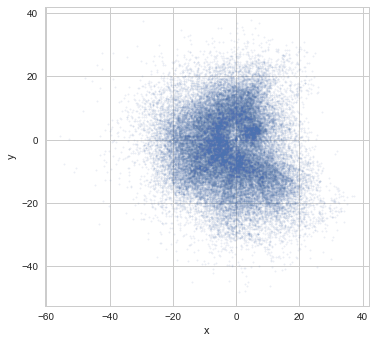

In [30]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2 Overview by Month

In [31]:
viridis = plt.get_cmap('viridis')

month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
        plt_configure(figsize=(3,3), title=title)
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4HNW9v9/tVVpppV31blnFlhvGxsaAbYpNNZD4AkmA
AAk/kpCEcBPKDeBAqIELJJBwkxAgIRBKaKGEZmMw4AK2wZat3utKq+29ze8PsYuFZFuyRsVE7/Po
eaSZnTOzo/nMOefbjkQQBIEZZpjhqEA61RcwwwwzjJ4Zwc4ww1HEjGBnmOEoYkawM8xwFDEj2Blm
OIqYEewMMxxFzAj2P4AZz93XhxnBTgKrV6+mrKyMu+++e8T9XV1dlJWVUVZWhs1mE/Xc7777Lhs2
bEj8/dBDD7Fw4UJRz+HxeFi1ahVvvvmmqO3OMJwZwU4SEomEd955Z8R9b7311oSd969//SsWi2XC
2vd4PPzwhz+ku7t7ws4xw5fMCHaSWLhwIZ2dnezfv3/YvjfffJOysrIpuKrxsWPHDtavX09tbe1U
X8p/DDOCnSQqKirIy8sb1pt2d3ezd+9e1q5dO+yYd955h2984xssWLCAk046iQcffJBIJJLYv3r1
av785z+zYcMGlixZwqJFi7j++uvxeDwAXHzxxezYsYPNmzdTVlZGZ2dn4tg33niDNWvWUFVVxfnn
n8+uXbsS+zo7OykrK+Ohhx465Hf60Y9+xOzZs3n00UeP6J7MMHZmBDuJnHbaacOGxW+99Rbz588n
MzNzyPZnn32Wq6++mnnz5vHwww/zne98h8cee4wbbrhhyOf++Mc/4nK5uP/++7nmmmt4/fXXeeSR
RwDYsGEDlZWVLFq0iGeffRaz2QyA3+/ngQce4Cc/+Qm//e1v8fv9/PjHP068DMxmM88++yzr168/
5Pd56qmn+O1vf4vRaBzXfZlh9Min+gL+k1i7di1/+ctfaGpqoqSkBBgcDp9++ulDPheNRnnwwQc5
88wzEwajFStWkJSUxIYNG/je975HeXk5AJmZmdx///1IJBJWrFjB+++/z6OPPsqSJUs46aST0Ov1
aLVarr32Wv72t78Bg1bje++9lwULFgAQiUT48Y9/TGNjI+Xl5SiVysS+QzF79mzR7s0Mo2Omh51E
qqqqyMrK4u233wagp6eHPXv2sGbNmiGfa25uxmazDRsmn3nmmQB8+umnQ9qUSCSJv00mEzDYu7rd
7hGvQyaTMW/evMTfOTk5AAf9/AzThxnBTiISiWTIsPitt95i3rx5ZGVlDfmc0+kEIC0tbcj2pKQk
lEplYo4KoNFohp1DJpOxYsUK7rrrrhGvQ6VSIZV++a+P/x6LxY7wm80wWcwIdpI57bTT2LdvH52d
nbz11lvDhsMAKSkpAAwMDAzZ7nK5CIVCif2H4oYbbmDr1q04HA5xLnyGacGMYCeZRYsWYTKZeOaZ
Z/j888+HDYcBioqKSE1NHRaI8MYbbyTaOBx6vZ5f//rXtLa2DrEsz3B0M2N0mmSkUimnnnoqTzzx
RGJO+1VkMhlXX301v/71rzEYDJx88snU1dXx0EMPsXbt2lEbe1asWIHJZGL37t1oNBqCweCojguF
Quzfv5/MzMxh1usZppaZHnYKOO200wiHwyP6XuN85zvf4Y477mD79u1cddVVPPXUU1x22WXcd999
YzrXbbfdht/vx2q10tjYOKpj+vr6uOCCC3j++efHdK4ZJh7JTE2nrxednZ1ccsklbNq0KbHtww8/
5IorrmDjxo3k5uZO4dXNMF5mBDvDDEcRM0PiGWY4ipgR7AwzHEXMCHaGGY4iZtw6XwNisRjRaDRR
WUIQhMTvEolkyI9MJhsSyjgVbNq0iYcffhifz8eKFSu46aabhuzv6+vjpptuwmKxoNFouO+++2aM
ZV8wY3SaxgiCQDgcJhQKEQ6HEz/BYDCxLRKJjDmkUCaToVAoUCgUKJVKlEpl4m+FQoFKpUIun5h3
eUdHB9/61rd4/vnnSUtL49JLL+XKK69k5cqVic9897vfZc2aNVx00UX84x//YOvWrfzud7+bkOs5
2pgR7DRBEARCoRA+nw+v14vX68Xn8xGLxZBKpYkfuVyOXC5PCE2lUiV+j4tMKpUSjUb57LPPWLBg
ARKJBEEQiEQihEIhgsHgMNHHhR+LxRAEAYVCgVarTWT7aLVaUUT82GOPYbFYuPHGGwGwWCwolUpS
U1MBsNlsnHHGGWzduhWJREIoFKK7u5vCwsJxn/vrwMyQeIqIRCK43e5h4pTL5SgUCjQaDWlpaRgM
BhQKxbjOFQ/ul8lkqFQqkpKSDvpZQRDw+/04nU68Xi9Wq5VwOEwsFhsiYp1Oh16vH/Pwuq2tDaVS
yRVXXEFfXx+rV6/mmmuuSezv6OggOzubu+++m61bt5KVlcUtt9xyZF/8a8iMYCeRYDCIw+HAbrfj
9XoTQ1OtVovJZMJgMCCTyab0GiUSSaJHPZBQKITdbsflctHf3093dzcSiQSDwUBKSsqorz0ajbJl
yxaeeuopdDodP/zhD3nppZc4//zzgcEX2b59+/jhD3/IjTfeyPPPP88NN9zAk08+OSHf92hjRrAT
iCAI+Hw+7HY7DoeDYDCIQqFAr9eTk5NzyJ5uuqFUKsnIyCAjIwMYNHTZbDYGBgZob28nGo2i0+kw
Go0YDAZUKtWI7aSnp7Ns2bJE6uDJJ5/Mnj17EoI1mUxotVpOOeUUAM466yxuv/32SfiGRwczghUZ
QRASQ0mHw0EsFkOlUpGSkkJGRsa4h7fTBalUSnp6Ounp6QB4vV76+vro7e2lo6MDlUpFamoqJpMJ
pVKZOG7VqlVcd911OJ1O9Ho9H374IatXr07sz8/PJysri02bNrF69Wref/99KisrJ/37TVdmjE4i
EY1GsdvtWCwWgsEgKpWKtLQ0zGbzkGTxybyeuNFpsofZwWAQi8WCw+EgHA5jMBgwm80kJSUhkUj4
5z//yRNPPEE4HGbZsmXcfPPN3HLLLaxevZqTTz6Z5uZmNmzYgN1uR6fTcffdd1NUVDSp32G6MiPY
cRIIBOjr68NqtSKVSklJSSEnJ2fKe9KpFOyBeDweurq68Hq9yOVyMjIySEtLmzC30dedmbt2BAiC
gMPhwGKx4PV6UavVFBQUYDQapzwoYbqh1+spKysjGo3S09NDb28vXV1dGI1GzGbzMOPWDIdmpocd
A4IgYLPZ6OrqIhqNotfrycvLQ61WT/WlDWO69LAjYbfb6e7uJhAIoNfryc3NRafTTfVlHRXM9LCj
QBAEXC4XHR0dhMNhUlNTycvLm3ZCOFpITU0lNTUVv99PW1sbtbW1ianEdHz5TSdmBHsYPB4PHR0d
+P1+UlJSKCgomBGqSGg0GsrLy/H7/bS0tLBv3z7S0tLIzs4eYlme4UtmBHsQ/H4/nZ2duN1ukpKS
qKqqmnJD0tcVjUZDZWUlHo+H1tZWqqurMZvNZGZmzhinvsLM3fgKkUiEjo4ObDYbWq2WioqKYbV/
Z5gY9Ho9c+fOxWaz0dnZSX9/P1lZWWRkZMwY875gRrAHYLfbaWtrQyqVUlpaSnJy8lRf0n8kRqMR
o9FId3c3PT092Gw2iouLZ+a3zAgWGOxV29racDqdmEwmcnJypiTYYYahZGdnYzabaWxsZP/+/WRn
Z//H97b/8YK12+20traiUChmhr8icu2117Jv375Er3j11Vdz6qmnJvZv3bqVe+65h2g0Sk5ODvfc
cw8Gg2FYO3K5nPLycqxWa2Kq8p/c2/7H+mEP7FUzMjLIzs7+Wr25p9oPe9ppp/Hcc8+NuKxINBpl
1apVPP7445SUlHDfffchlUq59tprD9lmNBqlsbERr9f7H9vbTptxX3wR4ffff3/I9tWrVw9ZiDgc
DrNw4UJsNlt

## 2.3 Create input data, i.e. speed_set

In [32]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [33]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28]


In [34]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [36]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

if KDE_GRIDSEARCH == True:
    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)
    
    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    
    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']

CPU times: user 325 ms, sys: 77 ms, total: 402 ms
Wall time: 5min 20s


In [38]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

bandwidth = 1.9
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 3249
[  3.07399504e-06   4.48665263e-06   6.38712747e-06   8.04420805e-06
   9.09180432e-06]


In [39]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWuUK2d5JvrUVVKr75fd99592cbExgYbEzNwgOCJTzLG
nOPEwcYmJDnHZCVwbFYCmeBhJpg4hFvWyRUDs+LD4oRcwJCEIZBhMticGPCMwWQZiA3epnvv3a2+
Sq1WSypd6np+lL5SVamqVFVS9Zba9ay1195bUtX3Sap69F6e930pTdM0xIgRI8YpBX25NxAjRowY
USImuRgxYpxqxCQXI0aMU42Y5GLEiHGqEZNcjBgxTjVikosRI8apRkxyMWLEONWISS5GjBinGjHJ
xYgR41QjJrkYMWKcasQkFyNGjFONmORixIhxqhGTXIwYMU41YpKLESPGqUZMcjFixDjViEkuRowY
pxoxycWIEeNUIya5GDFinGrEJBcjRoxTjZjkYsSIcaoRk1yMGDFONWKSixEjxqlGTHIxYsQ41YhJ
LkaMGKcaMcnFiBHjVIO93BuIcfmhaRpEUYQsy2AYBhzHgaZpUBR1ubcWI0bHoDRN0y73JmJcPqiq
ClmWoSgKJEkyHqcoCvl8HmfOnAHP8zHpxehbxJbcCxiCIODw8BDT09MGgZmJLJfLYXR0FJIkgaIo
MAwDmqZjSy9GXyEmuRcgNE2DLMuo1+sol8uYnp52fJ2d+BRFMY6jaRoMw4BhGLAsG5NejJ5FTHIv
MKiqCkmSoGlaKFKiKMqR9CiKMsiOZVkwDNPtrceIEQoxyb1AoGkaFEWBoigAmtZZpyFZM1HKsgxN
02LSi9FTiEnuBQCSXFBV1UJK7Sw5iqICk6Ab6RH3Nia9GCeNmOROOYhL6eaeRp1cN1uMJIt74cIF
XHHFFTHpxTgRxCR3SuHmnppxORIFxDokpBdbejGiRkxypxBu7mlQhHFXw6wBICa9GJEhJrlThnbu
qRknQWJBEZNejG4jJrlTArv15teCM5NcL+rc/JAez/M9ufcYvYGY5E4BVFXFzs4OFEXBzMyM7+PM
BJLP51Eul5FKpTAwMACO4/rO0qtWq0in00ilUjHpxTAQk1yfg2QswxKSqqrY2tqCKIoYHh5GtVrF
4eEhKIqCoigolUoYGhoCx3ER7L5zmElvf38fZ86cgSzLlooMQtgxXpiISa5PYZZkhL2Ba7UaFEUB
y7KYn5+HoigYHR2FpmmQJAmbm5uoVqs4OjoCTdMYGBgwLD2W7c1Lh7jq5PORJAm1Wi0mvRcwevNK
jeEJp+RCEEtO0zQcHh4im82CpmnMzc0ZkhNyLp7nwTAMpqamwHEcRFFEpVJBqVTCwcEBWJY1CG9g
YKBnEwF29zYmvRceYpLrI3hp3/ySnCzL2N7ehizLOHv2LC5dutT2GIqikEgkkEgkMDY2ZsTBKpUK
jo+Psb+/D47jDNJLpVJ9RXokpkeILya904WY5PoE3dC+CYKATCaDkZERLC0tGWQZFBRFIZlMIplM
Ynx8HJqmoVaroVKp4OjoCLu7u0gkEhbSo+lmE+qokhlhmg6Q16uqajQvMJMey7JgWTYmvT5GTHJ9
AHNDS7ebzcuS0zQN2WwW+Xwe8/PzGBoaajnGrSLCDyFRFIVUKoVUKoWJiQmoqmqQXj6fR61WQzKZ
NF7Ty3AiPUmSUCqVMD09HZNeHyImuR5GkOSCGyFJkoRMJgNN07C2tnYiWVKSpBgYGACgE0a1WkWl
UkEulwMAbG1tGa9JJpM9SxoURUGWZVQqFcO9pSgqtvT6CDHJ9Si64Z6WSiVsb29jbGwMZ86caTnP
SengaJpGOp1GOp2Gpml4/vnnMTY2hmq1ioODA0iShGQyaZBeIpHoWdJwsvRi0uttxCTXY9A0DdVq
1Qjc+71ZzIRFNGOFQgELCwsYHBwMtZcoSXBwcNDYl6IoqFQqqFar2NvbgyzLlsyt34qGsI1AOzlv
THq9j5jkeghkatYPf/hDvOQlLwl0LCEkURSRyWRA0zTOnTvnqWfrlYoGhmEwNDRkxAqJe1itVlEo
FKCqqoX0ejn76UR6ACzzMRiG6dn9n0bEJNcjINo3VVUBhLNKZFnG+vo6JicnMTk52bc3EsuyGB4e
xvDwMAA9rkhievl8HpqmGYSXSqUiJ71OLMSY9C4/YpK7zLBr34jUIsiNpaoqjo6OUKvVsLKyYgT8
28GsGXNbqxcsPY7jwHEchoeHjWoMcyKDoigMDAwYcUye5y/3ll1hJ718Po9qtYrZ2VljKFBMet1F
THKXEWHbkptRr9extbUFmqYNl65b6MUbjVRj8DyPkZERw0WvVqsolUrY2dkBwzAWS6/TErSoYn3k
3JqmGaQniiIAtMzH6MXvol8Qk9xlglffN7+xskKhgN3dXWMAdDabDbwPspa55rOfYK7GyOfzWFhY
gKZpqFQqKBaL2N/fB8uylrrboNUYUX4m9u/fPAlNURSIomiZeRuTXnDEJHfCsGvfwohwVVXF7u4u
BEHA8vIyUqkUBEHo+l77lfR4nm9bgkZIz28JWpSWnNe5Y9LrHDHJnSD8at+8yKVWq2FrawvJZBJr
a2sWqUkYQupHIguCTkvQgOjd1SCISS84YpI7IRDrDQg3ClDTNBQKBezt7WFmZgajo6OhCvRPMzot
QTs8PES9XjdK0Eg1RtTodA4H4Ex6RK/3Qu+cHJNcxAjT981OWIqiYGdnx8iedvPGa0eO/UacQW9m
rxK0bDYLURSNJEC1Wu16CVq3rUQz6dVqNezt7WF5efkFbenFJBch/BTWO8FMPNVqFVtbW0in01hb
W2txpZyO6RZeSDcCgbkEDdC/w1wuF1kJWpSuMGAlPVmWW9xbjuNA0/Sp/q5jkosARPv2zDPPtK06
cAJFUVBVFYeHhzg4OMDs7CxGR0fbHhPH5LoPhmEMd+/MmTNGCVqlUumoBI1A0zTXH65O4Za5BV5Y
pBeTXJdhTi6Q/weFpmnY29uDqqpYXV1FIpHo9jYd13RKiPQTAUZtFQHuJWiVSiVUCVrUSQ0/mVvA
mfSIOLnfSS8muS7Crn0LYyVVKhWIooihoSEsLCz4/pXvxJJTFMUo6Od53hKjiuFNFk4laKTu1l6C
RkjPfu6ooKpqICvRifTsreL7kfRikusCiHsqy7JF+0bTdKC5C7lcDrlcDhzHYWJiIvAFGuaG0TQN
m5ubSKVSOHfunDHLoVAooFKpGDMRSKYxKtfqtIDjOIyMjBjVGIT07CVoRK5yOS25djBfy+T6rtfr
oCgKLMtCVVVwHNfTZXRATHIdw0v75pd4ZFlGJpOBoihYW1vD9vb2ibiJhUIBsizjzJkzmJqagizL
Fk1ZJpMxMrm5XA71et3iivVy37duIixZmEvQyBQ0UoJWLpdxcHAAQLf+GIbpSglaN/btBvO5ZFnG
zs4O0uk0RkZGDAuPXEO9NOMjJrkO0E775ofkyuUyMpkMRkdHMT09HdrNDXKMqqrY29tDuVwGy7IY
GRlx3D9N00gkEkb8SVEUQ15Bgu52V+xykl6U/eS6AXMJGiG97e1tMAzTUoLWjYFAUccoNU0z9kfC
NDs7O4aOs1cQk1wI+NW+eRGP29yFdseFWcsMURSxubkJnuextraGjY0N32sxDGNpdmkOuufzeQCw
kF6vzmYNgyjIgoh1BwcHMTQ0ZFRjkD56u7u7RoyUWNBBwgUnQXL27G3QOOBJ4PRchScE0hPMzwXk
Rjxk7gIAx7kLUck6isUitre3MTU1hYmJiY5vAHPQ3Rx/Iq4Ymc2aTqcNq6Qf3duTknmYqzG8StDM
dbde+4qa5JwILcrPKixikvMJr5mnbnAiKzJ3YXx8HFNTU6Hd3CDHEElKsVjE2bNnLZlTr+OC7MMp
/kQK40k5Gim

In [40]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [41]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [42]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight   mean_x   mean_y  sig_x  sig_y    corr
1  0.360  -10.810   -3.351  8.389  9.393  -0.162
2  0.323    0.385    6.924  7.266  8.090   0.118
3  0.317    4.752  -12.377  9.033  8.403  -0.138

GMM Plot Result
0.35996594659 [[-10.81003652  -3.35108217]] [ 7.98176113  9.74203292] -152.455050427
0.323322019189 [[ 0.38512362  6.92364317]] [ 7.05237446  8.27629359] 156.201114805
0.31671203422 [[  4.75161275 -12.3768522 ]] [ 8.01882583  9.37524304] -121.132799238


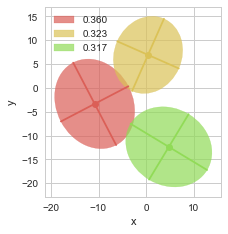

In [43]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [44]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm0LFldJvrtGHI883jvPecO59wqkEKGKktRQSYtRAYt
u6QKisfCtugWFZ4gLCxRKbRphpan9bALfN00DnQrg/ZDgSVPoHgUoqLgQ5Cugbr33DPPY2bkEMPe
74/IHbkjMiIzIjLj3JOn4lvrrqqTmXtHZGbEl99vJowxhhQpUqQ4pZCu9wmkSJEiRZJISS5FihSn
GinJpUiR4lQjJbkUKVKcaqQklyJFilONlORSpEhxqpGSXIoUKU41UpJLkSLFqUZKcilSpDjVSEku
RYoUpxopyaVIkeJUIyW5FClSnGqkJJciRYpTjZTkUqRIcaqRklyKFClONVKSS5EixalGSnIpUqQ4
1UhJLkWKFKcaKcmlSJHiVCMluRQpUpxqpCSXIkWKU42U5FKkSHGqkZJcihQpTjVSkkuRIsWpRkpy
KVKkONVQrvcJpLj+YIxB13WYpglZlqGqKiRJAiHkep9aihRdgzDG2PU+iRTXD5RSmKYJy7JgGIbz
OCEEe3t7mJqaQiaTSUkvRd8iVXJPYGiaht3dXUxPTzsEJhLZzs4ORkZGYBgGCCGQZRmSJKVKL0Vf
ISW5JyAYYzBNE/V6HeVyGdPT076v8xKfZVnOOkmSIMsyZFmGoigp6aU4sUhJ7gkGSikMwwBjLBYp
EUJ8SY8Q4pCdoiiQZbnXp54iRSykJPcEAWMMlmXBsiwATXXWrUtWJErTNMEYS0kvxYlCSnJPAPDg
AqXURUqdlBwhJDIJBpEeN29T0ktx3EhJ7pSDm5RB5mnSwXVRMfIo7sLCAm688caU9FIcC1KSO6UI
Mk9FXI9AAVeHnPRSpZciaaQkdwoRZJ5GRRxzNc4xAKSklyIxpCR3ytDJPBVxHCQWFSnppeg1UpI7
JfCqt7AKTiS5k5jnFob0MpnMiTz3FCcDKcmdAlBKsba2BsuycObMmdDrTpvSq1arKBaLyOfzKeml
cJCSXJ+DRyzjEtJJI7GoEElvc3MTU1NTME3TVZGhqmpKek9gpCTXpxBTMuLewKfxxuemOv98DMNA
rVZLSe8JjJTk+hB+wYUkTMuTaK5Ghde8TUnviYeU5PoI7XLf4lYn9DuJRYUf6XGfHie+lPROF1KS
6xP0KvftJCApYo3TdIC/nlLqNC8QSU9RFCiK0vef+RMZKcn1AcSGlkE3W7dKLqgiIgkT+CTDj/QM
w0CpVML09HRKen2IlOROMKIEF56IpudxgBAC0zRRqVQc85YQkiq9PkJKcicUx2GepsQYHX5KLyW9
k42U5E4YGGOoVqtO2VLYmyWNrsbzyXW7b0p6Jx/pSMITBD416+GHH468No2ungyIpGeaJqrVKkql
EjRNQ7VadVJ/UhwfUiV3QsBz3yilAJJTJUEwTROlUgn5fB6Kkl4WIrr5LvyUHgDXUCBZllOllyDS
q/k6w5v7JkmS83iUC7+bLr7lchkrKytQVRWbm5tQFAWFQsF1Xil6Ay/p7e3toVqt4uzZs85QoJT0
eouU5K4j4rYl90MckuOvX1lZwczMDLLZLBhjqNVqqFarTuF/NptFPp9HoVBAPp93iPik4Xr45Hqx
N2PMIT1d1wGgZT5GSnrxkZLcdUK7vm/HUWxvmiaWl5cBAHNzc8hms44plc/nkc/nUS6XMTExAQCo
VCrY3d1FvV5HLpdDoVBAoVBALpc79Tdgkj407/cvTkKzLAu6rrtm3qakFx0pyR0zvLlvvUrCjXLR
a5qG5eVljI6OQtM0qKradk9OaICtPqvVKiqVCra2tmAYhov0stnsqbwBk1Ry7fZOSa97pCR3jAib
+5ZUpJQxhu3tbezt7WFmZgaDg4PY3d2NdCxJklAsFlEsFgHYN1+lUkGlUsH6+josy3IIr1AonIo6
0KTN1ShISS86UpI7JnD1BiQ3CrDdGtM0sbKyAkopLl++HKjeokKWZQwODmJwcBAAYBiGo/T29vYA
wPHnFQqFRCO3/Zqa0e0cDsCf9Hi+3hO9c3JKcgkjTt+3Xueviebp1NRUpO4lUc9DVVWoqoqhoSEw
xmAYBiqVCjRNw87OjhO0SCpdpR8DD73cWyS9Wq2GjY0NXLp06Qmt9FKSSxBhCuv90Csl52eeRt2z
GxBCkMlkkMlkMDIy4rQqX1pawtHRkStdhUdun2gDapLOhxRJzzTNFvNWVVVIknSqSS8luQTAc9++
853v4IYbboisVnpBcmHN0+OseiCEIJvNAgBmZmacdJVKpYKDgwOsr68jm826IrcnIV0laSWX1HsM
itwCTyzSS0muxxCDC/zvOOiGeLh5OjIygunp6a4u2CQJkBDipKsA9mfFSW9nZydyuspxV4n0AtfT
FO5Eejw5ud9JLyW5HsKb+xZXJcVNBqaUYnt7G7u7u6HN03bneNwXtiRJLekqlUoF1WrVSVcRk5KP
K13lJEVXo4BSGkkl+pGet1V8P5JeSnI9ADdPTdN05b5JkhSb5KKu49G1UqnU0+jp9YQkSRgYGMDA
wAAAd7rKwcFBS7pKP0ZXT3JQQ7yW+fVdr9dBCIGiKKCUQlVVZDKZXp1yIkhJrku0y33rRslFWcfN
U8CuXoh6YfcyupokOqWr8LGExWLRydHrBY4rONBrJBW5BWyf79raGorFIoaHhx2FZ5omcrnciQog
pSTXBTrlviVNcowx7OzsYHd3F2fOnMH6+nrkizqsz+Ykwpuu8t3vfhf5fN6VriJGbuOmqxxnWVe/
7M3352TG3TRra2s4c+YMRkZGEjtuVKQkFwNhc9+SJDlv9FSSJKytrSVyrH4AN62Gh4cxOjrq9Oar
VCpOuoqqqi6fXhS10Y9EdBwk543eRvUDHgdSkosI3hMszAWUFMn5RU/7pSXScalDnq6SzWYd0uOR
2/39/UjpKseZ5tEvewP+gY0kP6u4SEkuJNrNPA1Cr0lONE+90dMkCPW0qDzAna4yPj7edbpKr5Ak
ESU9vtLv3FMl16eIO1Sml8Qjmqfz8/MtEa3TREhxEbXRgJiuYlmWE8TY3NyEaZqOaWuaZmKO9KT9
fUkSTqrkTglqtRo2NzdjJdVyH0UciBe/pmlYWVnB8PBwx/OIowz4sY6TKJNSMHH3lGXZla7C5zPw
uttyuYxarZZId5V+rKbg+3vPPSW5PgI3Tw3DwOHhIc6cORN5j27z5NqZp35r4iCJwMlpgKIornQV
PnWLNw8lhLgit3HTVfrdJ+dnrp6k9BEgJTlfiOapJEmx1Vg35iqlFIuLi4Hmabvj9TJPLoUNWZYx
PDyM4eFhV3eVcrmMra0tyLLsSkwOe6P3M8n5qbbUJ9cH4JndQDMtIS4JxF1rmiYODg4wNjYWyUyO
W9jfDv1CgMfdotyvu0q1WnWlq3CVVygU2kZu+5HkuKUh7i+6PU4SUpJrICj37ThJjpunpVIJw8PD
sUzkODgptau9wPU4Z0IIcrkccrlc5HSVfiY5sewLOJkqDkhJDkD73DfRPxYn8BCW5Hj01LIsjI6O
xsrO70bJHR4eYmNjw3UzprAR9bsPk67Cn6eUJqZCk0wh6ZegA5CSXKjSrLi+rrCk442ebm9vH1th
P2MMu7u7qNVqmJ6ehmma0DQNu7u7oJQim806/qaT5lDuF7RLV7EsC8vLy64W8b1qV54k6fiptqTz
8uLiCUtylFInufd6VS4ERU+7ST2JAsMwUKvVkMlkcPnyZQD258JrQTc2NkApbfEzncT5q/1k9onp
KqVSCbOzs04J2sHBASilLtKLm65y3J9JquROENrNPPUDJ52oSqZduZVonnqjp8fRvaRcLmNlZQWK
omBychKKojg

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QU2fa/7/hhCgNEes+iFYBJZUqvlReHumzozh1y2qd
dbVLBbFLp7+idG1ra7UUflbF7SBoXd1u69vs2m5bdlDU/nZap9PZXbUjre5aiY1VVKhY47uglqdJ
EAPJ+f0RTzgJ5zU5eb8/M5khuc99coPmm+u67uu+LhVN0zQIBAJBQWKCvQACgRB5EGEhEAiKQ4SF
QCAoDhEWAoGgOERYCASC4hBhIRAIiqMO9gK8wWAwBHsJBIKL7Oxsydd+azwIh30w77hGo8HEiROV
WFZQCUthAYA91Y1+u7fZYoYuXue3+4cK5Pf0ncJVebKud9gHIymllnf85qX/6+uSQgLiChEIBMUh
wkIgEBSHCAuBQFAcIiwEAkFxiLAQCATFIcJCIBAUhwgLgUBQnLDNYyEQog2Hw4G1a9eipaUFGo0G
1dXVSE1NdY0fOnQIW7duhVqtRkFBAQoLC0Xn1NTUYPTo0SguLgYAfPjhh/j8888BANOnT8fLL78M
mqaRl5eHUaNGAQAmT56MFStWCK6VCAuBECYcOHAANpsNDQ0NMBqNWL9+PbZv3w4A6OnpQW1tLfbt
24e4uDgUFxdjxowZOHHiBOecO3fu4I033sDFixdRWloKALh8+TI+++wz7N27FzExMSguLsYTTzyB
uLg4jB8/Hjt27JC8VuIKEQhhgsFgwLRp0wA4rYbTp0+7xtra2pCSkoKEhARoNBpkZ2fj+PHjvHOs
ViuWLl2KuXPnuu4xbNgw7Ny5ExRFQaVSobe3FwMGDEBzczNu3ryJkpISLF68GBcuXBBdKxEWAiFM
sFgsiI+Pdz2nKAq9vb2uMZ2u79iCVquFxWLhnZOcnIxHH33U7f6xsbEYMmQIaJrGhg0bkJGRgdGj
RyMxMRFlZWWoq6vDCy+8gPLyctG1EleIQAgT4uPjYbVaXc8dDgfUajXnmNVqhU6nE5zDxb1797By
5UpotVpUVVUBACZMmACKogAAOTk5aG9vB03TUKlUvPchFguBECZkZWWhsdF5+NZoNCI9Pd01ptfr
YTKZ0NnZCZvNhqamJmRmZgrO8YSmabz44ot45JFH8NZbb7nEZMuWLfjoo48AAOfOncPw4cMFRQUg
FguBEDbk5+fjyJEjWLBgAWiaRk1NDfbv34+uri4UFRWhsrISpaWloGkaBQUFSEpK4pzDx4EDB/DN
N9/AZrPhq6++AgAsX74cZWVlKC8vx+HDh0FRFGpr+U9nM6jCsf2HwWAgZRMUgPyevlO4Kk9WPRaD
wSBaNkHO/UIVYrEQCAGmo/t8sJfgd4iwEGTReueupOvSh8T5eSXhywX6F7xjowK3DL9ChIXQDzHx
0E9MFhxvO3XZdQ8iMNFJQIWlp6cHK1euxNWrV2Gz2bBkyRI8/PDDqKyshEqlwpgxY1BVVYWYGLJZ
pRRCImG3q0DZuMfFxEMIZi4jMERcoo+ACstnn32GwYMHY+PGjejs7MS8efMwduxYLFu2DLm5uViz
Zg0OHjyI/Pz8QC4rrPHFujCbzW5JVUqjn5hMxCVKCaiwzJo1CzNnzgTg3DOnKArNzc2YMmUKACAv
Lw9HjhwhwiKCp5j4Yl34GyIu0UlAhUWr1QJwph+/8sorWLZsGTZs2OBKttFqtTCbzZLuZbZIu85b
/H1/uVy525eQNFz/M7cxqX8zLnyZK5WhowbjetttnO2wYGRccLIbQu3fM9IJePD2+vXreOmll7Bw
4ULMmTMHGzdudI1ZrVYMGjRI0n38mX8RSvkdjHVCUcpbJv52hdjoJuvQduoydPGBt1pC6d8zWgho
lPTWrVt4/vnnUV5ejqeffhoAkJGRgWPHjgEAGhsbkZOTE8glhSytd+66REU/MTmk3R05SN2uJoQ3
AbVYduzYgZ9++gnbtm3Dtm3bAABvvvkmqqursXnzZqSlpbliMNEK+4MXKWLCwMRbCJFPQIVl1apV
WLVqVb/X//a3vwVyGSFJJAsKIfogCXJBJpiCct5+D2pzr0/3mKh7UPYcskMU+RBhCSLsGIo/OGX+
UXD8oRGDfAretn1/w/UeUgWGuEPRARGWIOAPK4VLRPRjhgnO8XWrmbm/NwJDiGyIsAQYJa0UTzER
ExJ/4SkwRFwIRFgCiBKiEipiwoV+zDC0fX8j2MsghABEWAKEr6LCFhSlxOR72grK2i35+ke1iZKu
I1YLgQhLAPBFVJQSlJPWDs7X01OHSprfamp3uwefyBCrhQAQYQkYckXFV0HxFBIuAZFzfoY9nxEZ
IQtGyGrRT0xG66nLUbvlfMFyhXdsVOCW4VeIsPiZ1jt3vRYVuYIiRUyUID11qKC4EKtFmE77z4O9
BL9DhMWPBEpU2ILiLzHxhHmfk6Z2ybEXQvRAhMUPeBtTkSMqvoqJsecm7Go7qJ4u0WsnxyaJroVL
XEgQN3ohwqIw3ohKIATF2HOz32upg+MlZd4ar/XN9RQZxi3yhLhDyuNwOLB27Vq0tLRAo9Gguroa
qamprvFDhw5h69atUKvVKCgoQGFhoeicmpoajB49GsXFxQCAPXv2YPfu3VCr1ViyZAkef/xxdHd3
o7y8HLdv34ZWq8WGDRswZMgQwbWS4rIK4VnmQCreiEp66lBJomLsuel6AMC4h4a6PaTCvp5LoNhr
kwMpoSCPAwcOwGazoaGhAStWrMD69etdYz09PaitrcUHH3yAuro6NDQ04NatW7xz7ty5g0WLFuHQ
oUOue3R0dKCurg67d+/G+++/j82bN8Nms2HXrl1IT09HfX095s2b56pMIASxWHzEl/R8qaLCFhQx
PD/4cgREjHEPDcXZa+0w9tx0s1z4rBYhyJkh+RgMBkybNg0AMHnyZJw+fdo11tbWhpSUFCQkJAAA
srOzcfz4cRiNRs45VqsVS5cudbVfBYDvvvsOmZmZ0Gg00Gg0SElJwblz52AwGLBo0SIAzvKxRFj8
iK/nfZQWFbagKCkmnjDiIhUSZ1EOi8WC+Ph413OKotDb2wu1Wg2LxeLm1mq1WlgsFt45ycnJSE5O
dhMWoXswr0stH0uERQZKHB6Uk58iRVQCJShc7+sZb/EM4kqJs5ASCtKJj4+H1Wp1PXc4HFCr1Zxj
VqsVOp1OcI7Y/bnuIbV8LBEWCSh1cFBJK8VbQWmhL7l+7h1oh5oWLq3wiCql32tcVgtxh/xPVlYW
vvzyS8yePRtGoxHp6emuMb1eD5PJhM7OTjzwwANoampCaWkpVCoV7xxPJk2ahHfeeQf37t2DzWZD
W1sb0tPTkZWVhcOHD2PSpElobGyU1FuaCIsASgsKoKyoSBUUtpgAQEaic55YMe0zHe2uuVwCw2W1
eAOxWqSRn5+PI0eOYMGCBaBpGjU1Ndi/fz+6urpQVFSEyspKlJaWgqZpFBQUICkpiXMOH4mJiSgp
KcHChQtB0zRee+01DBgwAMXFxaioqEBxcTFiY2OxadMm0bWqaJoOTj8GHzAYDNhT3Sh+oZeYLWZc
tzk1N1BWCiAuKnIEhS0mjJB4IrVK/5kOpyXiKS5nr7W7CUsrR7Ic4woJxVna/Jze788q/YWr8iR9
gzMYDAb8P83XvOO/sU2Vdb9QhVgsHFy5q/K53UawrBQpgiKXjMShLnERw5s4C0CslkiDCIsHStZM
kSoogO+iwgiKUmLC9x6eVgvbHfImzgKQWEskEpQEuZMnT6KkpAQAYDKZUFxcjIULF6KqqgoOhyMY
SwLQJyqenQalcsr8I06Zf4R+zDBZVoqQ6yMmKi30JbTQl5CRONSvosJ1bzlBY7H6u/qJySRhLoII
uLD85S9/wap

## Goodness-of-fit Statistics

In [45]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.013      0.023  2.755704e-09      0.041       0.175

# 5. GMM by Optimization

In [46]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [47]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.974018156173326
     jac: array([  1.93790793e+00,  -2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00,  -2.38418579e-07,  -4.76837158e-07,
         1.93790913e+00,   0.00000000e+00,  -2.38418579e-07,
        -2.38418579e-07,  -2.38418579e-07,  -2.38418579e-07,
         1.93791151e+00,   0.00000000e+00,  -2.38418579e-07,
        -2.38418579e-07,  -2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1636
     nit: 81
    njev: 81
  status: 0
 success: True
       x: array([  0.67397398,  -6.27280119,  -4.4998559 ,   9.89295307,
        10.24029544,  -0.22057438,   0.20796292,   1.97089729,
         8.91124012,   6.76930453,   6.83677453,  -0.10499095,
         0.11806309,  10.29339288, -12.85362135,   7.06404787,
         6.39371094,  -0.32966714])

## 5.1 GMM Result

In [48]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.674  -6.273   -4.500  9.893  10.240  -0.221
2  0.208   1.971    8.911  6.769   6.837  -0.105
3  0.118  10.293  -12.854  7.064   6.394  -0.330

GMM Plot Result
0.673973983797 [[-6.27280119 -4.4998559 ]] [  8.87409145  11.13484046] -139.446653398
0.207962922825 [[ 1.97089729  8.91124012]] [ 6.43442695  7.15283996] -137.698188838
0.118063093378 [[ 10.29339288 -12.85362135]] [ 5.46190053  7.80691709] -126.573225508


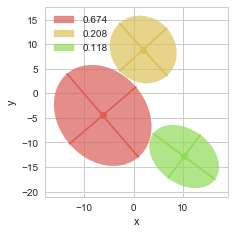

In [49]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [50]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.058  2.115408e-09      0.036       0.153

In [51]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuYNHddJ/qpa1+nZ6Zn5p2Zd2bey0wShCyRJCywcACN
Rn2ISlY0SliPR4OArjlyW2VVRHlcLuIiuxrEI0aPrAqoZ1HQRz0gxyicw80FNJuQ5L3Mpec+PX2r
vtTtd/6o/tVUVVdVV1V3zds9b33yzJN3evpXv+ruqk9/vneGEEKQIEGCBGcU7I0+gQQJEiSIEwnJ
JUiQ4EwjIbkECRKcaSQklyBBgjONhOQSJEhwppGQXIIECc40EpJLkCDBmUZCcgkSJDjTSEguQYIE
ZxoJySVIkOBMIyG5BAkSnGkkJJcgQYIzjYTkEiRIcKaRkFyCBAnONBKSS5AgwZlGQnIJEiQ400hI
LkGCBGcaCcklSJDgTCMhuQQJEpxpJCSXIEGCM42E5BIkSHCmkZBcggQJzjQSkkuQIMGZRkJyCRIk
ONNISC5BggRnGvyNPoEENx6EEMiyDFVVwXEcBEEAy7JgGOZGn1qCBAODIYSQG30SCW4cdF2HqqrQ
NA2KopiPMwyDcrmMc+fOQRTFhPQSjC0SJXcTQ5IkHB0dYX5+3iQwK5EdHh5iamoKiqKAYRhwHAeW
ZROll2CskJDcTQhCCFRVRafTQaPRwPz8vOvznMSnaZq5jmVZcBwHjuPA83xCeglGFgnJ3WTQdR2K
ooAQEomUGIZxJT2GYUyy43keHMcN+9QTJIiEhORuEhBCoGkaNE0DcKLOBnXJWolSVVUQQhLSSzBS
SEjuJgANLui6biOlfkqOYZjQJOhFetS8TUgvwWkjIbkzDmpSepmncQfXrYqRRnGvXbuGW2+9NSG9
BKeChOTOKLzMUytuRKCAqkNKeonSSxA3EpI7g/AyT8MiirkaZQ8ACekliA0JyZ0x9DNPrTgNEguL
hPQSDBsJyZ0RONVbUAVnJblRzHMLQnqiKI7kuScYDSQkdwag6zq2t7ehaRoWFhYCrztrSq/VaiGX
yyGTySSkl8BEQnJjDhqxjEpIo0ZiYWElvb29PZw7dw6qqtoqMgRBSEjvJkZCcmMKa0pG1Bv4LN74
1FSn74+iKGi32wnp3cRISG4M4RZciMO0HEVzNSyc5m1CejcfEpIbI/jlvkWtThh3EgsLN9KjPj1K
fAnpnS0kJDcmGFbu2yggLmKN0nSAPl/XdbN5gZX0eJ4Hz/Nj/57fzEhIbgxgbWjpdbMNquS8KiLi
MIFHGW6kpygK6vU65ufnE9IbQyQkN8IIE1y4GU3P0wDDMFBVFc1m0zRvGYZJlN4YISG5EcVpmKcJ
MYaHm9JLSG+0kZDciIEQglarZZYtBb1ZkuhqNJ/coMdNSG/0kYwkHCHQqVlPPPFE6LWD+uTa7TbK
5TKazeZYEduowUp6qqqi1WqhXq9DkiS0Wi0z9SfB6SFRciMCmvum6zqA+FSJG8rlMvb29pDP51Gv
1yHLMjKZjNnaPJVK3dRKZJDPwk3pAbANBeI47qZ+f+NGQnI3GM7cN5ZlzcfDXPhRlBwl1KOjI6yu
rtpmNzSbTezt7eHo6AgHBwfIZDLIZrPIZrNJQfwAcJJeuVxGq9XC4uKiORQoIb3hIiG5G4iobcnd
EJbkWq0WNjc3AQCrq6vgOA6yLAMwVMbExASOj48xNzcHQRDQbDbRbDZxfHwMQohJeJlMBqIohj7f
OHAjfHLDODYhxCQ9+hk452MkpBcdCcndIPj1fYuz2J4QguPjY+zt7WFxcRGlUqlvaRjP8ygUCigU
CgAARVFM0js8PATDMCbpZbNZ8PzZuqzi9KE5P3+rmtY0DbIs22beJqQXHmfrahwDOHPfhpWEG+Si
1zQN29vb6HQ6WF1dRSqVQqlU8j2m23kIgoDJyUlMTk6awZJms4l6vY79/X3wPG8zb89Cg8s4lZzf
sRPSGxwJyZ0igua+xVGHSs3TXC6H1dVV0/c3aJoIwzBIpVJIpVKYnp42+7s1m01Uq1Xs7u5CFEWT
8NLpdOS9bhTiNlfDICG98EhI7pRA1RsQ3yhAtzVO83RqairUccOCYRik02mk02kUi0Uz76/VaqFc
LqPdbgMADg8PTdKjhDsoxjU1Y9A5HIA76dF8vZs9UJSQXMyI0vdtWEm4buZp2L2GMXyaqriZmRlo
moYrV66AEIKDgwMzXYU+Z9B0lXEMPAzz2FbSa7fb2N3dxaVLl25qpZeQXIwIUljvhmEoOS/zNOwx
hw16HnNzcwCM96jVaqHZbGJ3dxeqqt5U6Spx50NaSU9V1R7zVhAEsCx7pt/jhORiAM19e/zxx3HL
LbeEjjYOQnJhzdMbXbrFcRzy+Tzy+TwAmMXwzWYTlUoFuq6bqSrZbPaG9HqLW8kNy1x3O7ZXatLN
RHoJyQ0Z1uAC/T0KoqaQbG1t+Zqnp3Eeg8AvXeXo6Mg3XeU0q0SGhRtpCvcjPZqcPO6kl5DcEOHM
fYuqkqJcUJ1OB4qigGXZUOap3zmOwoXtlq7SarXQaDR60lVGqRlnmGPHBV3XQ6lEN9JztoofR9JL
SG4IoOapqqq23DeWZSOTXNB1VvOUZVksLS2F3m9cYE1XmZqa6klXIYSYfkhq4sZlCg4LoxzUsF7L
9PrudDpgGAY8z0PXdQiCMDIVL15ISG5A+OW+DaLkgqyzRk8vXLhglmmFRZzR1TjhTFd5+umnMTs7
i06nY6arpFIpW45eFNI7reDAsBFX5BYwfKfb29vI5XKYnJw0FZ6qqkin0yOVAJ6Q3ADol/sWJ8k5
o6e6rg/dNB4nk4Qim80in89jZmYGuq6bkVtnukomk0E6nQ70Gk+zrGtcjk2PT8mMumm2t7exsLAQ
ez5mGCQkFwFBc9/iIDlCCMrlMvb3923RUxpZHeZe4w6WZZHL5ZDL5QDY01X29vZCpauMIxGdBsk5
o7dh/YCngYTkQoL2BAtyAQ2b5DRNQ6lUgizLQ4uenjZupDp0S1ehpEfTVaykR9NVTjPNY1yODbgH
NuJ8r6IiIbmA8Jt56oVhkly/5N44VONZVnmAka4yMTGBiYkJAN7pKqqqxvaFEicRxT2+0u3cEyU3
pog6VGYYxONlng5rr7OEQV+/M12Fkt7x8bGZtmLN0RuGcz1uf1+chJMouTOCdruNvb09zM/Ph/5W
pD6KKKDKMax5GkUZ0BvtNIkyLgUzrGMyDANRFCGKImRZBs/zyGazZrrK3t4eBEGwVWNEvbnHsZqC
Ht957gnJjREoySiKgmq1ioWFhdDHGCRPTpZlXLlyBfl8HsvLy30vnKg3ShyBk7MGeuM6u6u0221T
6e3s7ERKVxl3n5ybuTpK6SNAQnKusJqnLMtGVmNRSIImuLbbbZw/fz5UKJ7uF1XJJQgOhmGQyWSQ
yWTMdBVKeoeHh+h0Okin0zbSc/tcxpnk3FRb4pMbA9DMbuAk4zsqCYRdS83TTqeDYrEYOtcoamG/
H8aFAG90LhvLsiahAcHTVcaV5GjKkvX4VrfHKCEhuS68ct9Oi+Ro9DSfz2NqaupUJT8hBI1GA3t7
exBFEblcDplMZuQu1iAYlXMOmq6iqipUVY2lpdRpEKj1+KOo4oCE5AD4575ZWxhFCTz0Izlr9PT8
+fOYnJzE3t7eqSb2VioVNBoNzM3NQVEUVCoV7OzsgGVZKIoCURSH2sF33DAMsvBKV5EkCbu7u7bu
KplMBoIgDHzecaaQjEvQAUhILlBpVlSzoh/peEVP4655te7f6XSgaRrW1tYAGBdqsViEruvY2dkB
IUYHX0VRTB9TLpc7880s4wZNVzk6OsLy8jIAoNlsmt1VOI6zkV6UCWhxko6baos7Ly8qblqS03Xd
TO497coFwG6

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QU2fa/7/hhCgNEes+iFYBJZUqvlReHumzozh1y2qd
dbVLBbFLp7+idG1ra7UUflbF7SBoXd1u69vs2m5bdlDU/nZap9PZXbUjre5aiY1VVKhY47uglqdJ
EAPJ+f0RTzgJ5zU5eb8/M5khuc99coPmm+u67uu+LhVN0zQIBAJBQWKCvQACgRB5EGEhEAiKQ4SF
QCAoDhEWAoGgOERYCASC4hBhIRAIiqMO9gK8wWAwBHsJBIKL7Oxsydd+azwIh30w77hGo8HEiROV
WFZQCUthAYA91Y1+u7fZYoYuXue3+4cK5Pf0ncJVebKud9gHIymllnf85qX/6+uSQgLiChEIBMUh
wkIgEBSHCAuBQFAcIiwEAkFxiLAQCATFIcJCIBAUhwgLgUBQnLDNYyEQog2Hw4G1a9eipaUFGo0G
1dXVSE1NdY0fOnQIW7duhVqtRkFBAQoLC0Xn1NTUYPTo0SguLgYAfPjhh/j8888BANOnT8fLL78M
mqaRl5eHUaNGAQAmT56MFStWCK6VCAuBECYcOHAANpsNDQ0NMBqNWL9+PbZv3w4A6OnpQW1tLfbt
24e4uDgUFxdjxowZOHHiBOecO3fu4I033sDFixdRWloKALh8+TI+++wz7N27FzExMSguLsYTTzyB
uLg4jB8/Hjt27JC8VuIKEQhhgsFgwLRp0wA4rYbTp0+7xtra2pCSkoKEhARoNBpkZ2fj+PHjvHOs
ViuWLl2KuXPnuu4xbNgw7Ny5ExRFQaVSobe3FwMGDEBzczNu3ryJkpISLF68GBcuXBBdKxEWAiFM
sFgsiI+Pdz2nKAq9vb2uMZ2u79iCVquFxWLhnZOcnIxHH33U7f6xsbEYMmQIaJrGhg0bkJGRgdGj
RyMxMRFlZWWoq6vDCy+8gPLyctG1EleIQAgT4uPjYbVaXc8dDgfUajXnmNVqhU6nE5zDxb1797By
5UpotVpUVVUBACZMmACKogAAOTk5aG9vB03TUKlUvPchFguBECZkZWWhsdF5+NZoNCI9Pd01ptfr
YTKZ0NnZCZvNhqamJmRmZgrO8YSmabz44ot45JFH8NZbb7nEZMuWLfjoo48AAOfOncPw4cMFRQUg
FguBEDbk5+fjyJEjWLBgAWiaRk1NDfbv34+uri4UFRWhsrISpaWloGkaBQUFSEpK4pzDx4EDB/DN
N9/AZrPhq6++AgAsX74cZWVlKC8vx+HDh0FRFGpr+U9nM6jCsf2HwWAgZRMUgPyevlO4Kk9WPRaD
wSBaNkHO/UIVYrEQCAGmo/t8sJfgd4iwEGTReueupOvSh8T5eSXhywX6F7xjowK3DL9ChIXQDzHx
0E9MFhxvO3XZdQ8iMNFJQIWlp6cHK1euxNWrV2Gz2bBkyRI8/PDDqKyshEqlwpgxY1BVVYWYGLJZ
pRRCImG3q0DZuMfFxEMIZi4jMERcoo+ACstnn32GwYMHY+PGjejs7MS8efMwduxYLFu2DLm5uViz
Zg0OHjyI/Pz8QC4rrPHFujCbzW5JVUqjn5hMxCVKCaiwzJo1CzNnzgTg3DOnKArNzc2YMmUKACAv
Lw9HjhwhwiKCp5j4Yl34GyIu0UlAhUWr1QJwph+/8sorWLZsGTZs2OBKttFqtTCbzZLuZbZIu85b
/H1/uVy525eQNFz/M7cxqX8zLnyZK5WhowbjetttnO2wYGRccLIbQu3fM9IJePD2+vXreOmll7Bw
4ULMmTMHGzdudI1ZrVYMGjRI0n38mX8RSvkdjHVCUcpbJv52hdjoJuvQduoydPGBt1pC6d8zWgho
lPTWrVt4/vnnUV5ejqeffhoAkJGRgWPHjgEAGhsbkZOTE8glhSytd+66REU/MTmk3R05SN2uJoQ3
AbVYduzYgZ9++gnbtm3Dtm3bAABvvvkmqqursXnzZqSlpbliMNEK+4MXKWLCwMRbCJFPQIVl1apV
WLVqVb/X//a3vwVyGSFJJAsKIfogCXJBJpiCct5+D2pzr0/3mKh7UPYcskMU+RBhCSLsGIo/OGX+
UXD8oRGDfAretn1/w/UeUgWGuEPRARGWIOAPK4VLRPRjhgnO8XWrmbm/NwJDiGyIsAQYJa0UTzER
ExJ/4SkwRFwIRFgCiBKiEipiwoV+zDC0fX8j2MsghABEWAKEr6LCFhSlxOR72grK2i35+ke1iZKu
I1YLgQhLAPBFVJQSlJPWDs7X01OHSprfamp3uwefyBCrhQAQYQkYckXFV0HxFBIuAZFzfoY9nxEZ
IQtGyGrRT0xG66nLUbvlfMFyhXdsVOCW4VeIsPiZ1jt3vRYVuYIiRUyUID11qKC4EKtFmE77z4O9
BL9DhMWPBEpU2ILiLzHxhHmfk6Z2ybEXQvRAhMUPeBtTkSMqvoqJsecm7Go7qJ4u0WsnxyaJroVL
XEgQN3ohwqIw3ohKIATF2HOz32upg+MlZd4ar/XN9RQZxi3yhLhDyuNwOLB27Vq0tLRAo9Gguroa
qamprvFDhw5h69atUKvVKCgoQGFhoeicmpoajB49GsXFxQCAPXv2YPfu3VCr1ViyZAkef/xxdHd3
o7y8HLdv34ZWq8WGDRswZMgQwbWS4rIK4VnmQCreiEp66lBJomLsuel6AMC4h4a6PaTCvp5LoNhr
kwMpoSCPAwcOwGazoaGhAStWrMD69etdYz09PaitrcUHH3yAuro6NDQ04NatW7xz7ty5g0WLFuHQ
oUOue3R0dKCurg67d+/G+++/j82bN8Nms2HXrl1IT09HfX095s2b56pMIASxWHzEl/R8qaLCFhQx
PD/4cgREjHEPDcXZa+0w9tx0s1z4rBYhyJkh+RgMBkybNg0AMHnyZJw+fdo11tbWhpSUFCQkJAAA
srOzcfz4cRiNRs45VqsVS5cudbVfBYDvvvsOmZmZ0Gg00Gg0SElJwblz52AwGLBo0SIAzvKxRFj8
iK/nfZQWFbagKCkmnjDiIhUSZ1EOi8WC+Ph413OKotDb2wu1Wg2LxeLm1mq1WlgsFt45ycnJSE5O
dhMWoXswr0stH0uERQZKHB6Uk58iRVQCJShc7+sZb/EM4kqJs5ASCtKJj4+H1Wp1PXc4HFCr1Zxj
VqsVOp1OcI7Y/bnuIbV8LBEWCSh1cFBJK8VbQWmhL7l+7h1oh5oWLq3wiCql32tcVgtxh/xPVlYW
vvzyS8yePRtGoxHp6emuMb1eD5PJhM7OTjzwwANoampCaWkpVCoV7xxPJk2ahHfeeQf37t2DzWZD
W1sb0tPTkZWVhcOHD2PSpElobGyU1FuaCIsASgsKoKyoSBUUtpgAQEaic55YMe0zHe2uuVwCw2W1
eAOxWqSRn5+PI0eOYMGCBaBpGjU1Ndi/fz+6urpQVFSEyspKlJaWgqZpFBQUICkpiXMOH4mJiSgp
KcHChQtB0zRee+01DBgwAMXFxaioqEBxcTFiY2OxadMm0bWqaJoOTj8GHzAYDNhT3Sh+oZeYLWZc
tzk1N1BWCiAuKnIEhS0mjJB4IrVK/5kOpyXiKS5nr7W7CUsrR7Ic4woJxVna/Jze788q/YWr8iR9
gzMYDAb8P83XvOO/sU2Vdb9QhVgsHFy5q/K53UawrBQpgiKXjMShLnERw5s4C0CslkiDCIsHStZM
kSoogO+iwgiKUmLC9x6eVgvbHfImzgKQWEskEpQEuZMnT6KkpAQAYDKZUFxcjIULF6KqqgoOhyMY
SwLQJyqenQalcsr8I06Zf4R+zDBZVoqQ6yMmKi30JbTQl5CRONSvosJ1bzlBY7H6u/qJySRhLoII
uLD85S9/wap

In [52]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


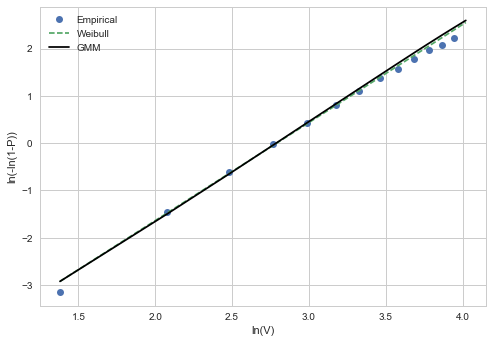

In [53]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(list(zip(*y_))[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


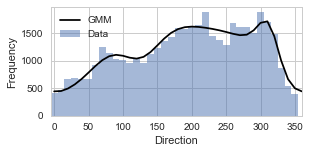

In [54]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

Speed Distribution Comparison


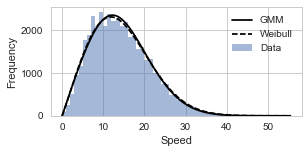

In [55]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print(title)

In [56]:
# %%time
incre = SECTOR_LENGTH 
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.899438638559


## 5.3 Sectoral Comaprison

In [57]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(list(zip(*y_))[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle)     )

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:61: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in log


5.0 (-5.0 - 15.0) degree


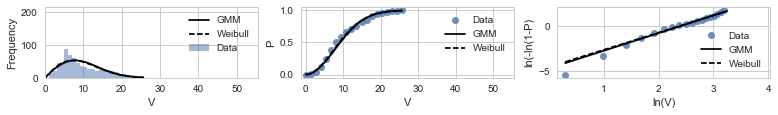

data size: 687 weight 0.016037537642692064
GMM Weibull
R square 0.722917458657 0.753510559509
max diff: 0.0853264520373 0.065016218703 speed value: 8.10112778237 y gmm 0.418312558152
 
25.0 (15.0 - 35.0) degree


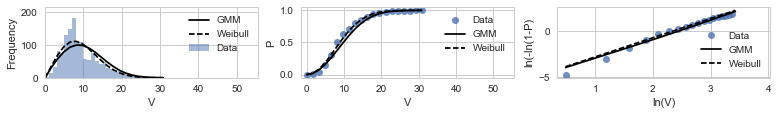

data size: 1348 weight 0.03146812335130845
GMM Weibull
R square 0.75299262598 0.835982876121
max diff: 0.136971679264 0.0649225311538 speed value: 9.73648335641 y gmm 0.496559478006
 
45.0 (35.0 - 55.0) degree


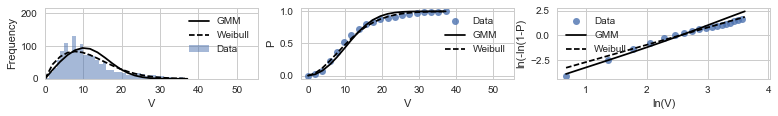

data size: 1339 weight 0.031258024604897634
GMM Weibull
R square 0.790026171156 0.867963679263
max diff: 0.0997769680296 0.0524232660386 speed value: 9.7701603065 y gmm 0.420013920693
 
65.0 (55.0 - 75.0) degree


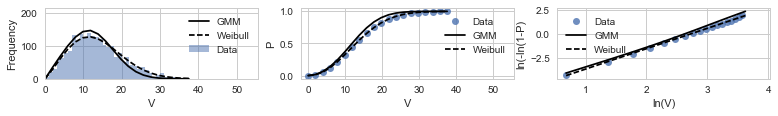

data size: 2180 weight 0.05089058524173028
GMM Weibull
R square 0.929015521972 0.973553121681
max diff: 0.0818034565402 0.0101816389193 speed value: 17.7716395283 y gmm 0.835014465714
 
85.0 (75.0 - 95.0) degree


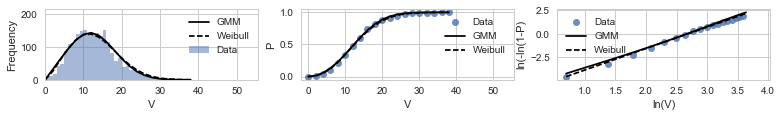

data size: 2183 weight 0.05096061815720055
GMM Weibull
R square 0.961913202504 0.960839014208
max diff: 0.0290963312534 0.0295841361441 speed value: 6.0006312758 y gmm 0.130333161304
 
105.0 (95.0 - 115.0) degree


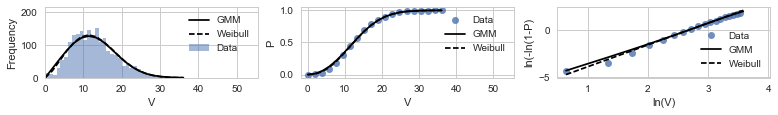

data size: 1983 weight 0.046291757125849146
GMM Weibull
R square 0.936101959971 0.947465487372
max diff: 0.0377621361079 0.0240900222309 speed value: 5.6982709834 y gmm 0.121977970702
 
125.0 (115.0 - 135.0) degree


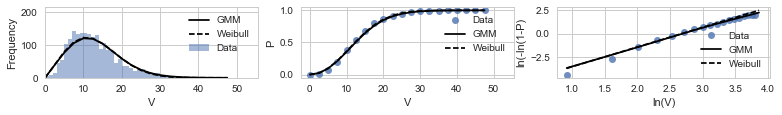

data size: 2007 weight 0.046852020449611315
GMM Weibull
R square 0.94170473524 0.946826779755
max diff: 0.0384025340235 0.0344433240907 speed value: 15.0121216861 y gmm 0.64420832796
 
145.0 (135.0 - 155.0) degree


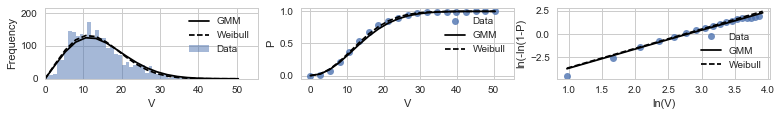

data size: 2353 weight 0.054929150033849246
GMM Weibull
R square 0.92139908117 0.937829752549
max diff: 0.0660879167345 0.0325885734587 speed value: 15.9203059832 y gmm 0.613470094315
 
165.0 (155.0 - 175.0) degree


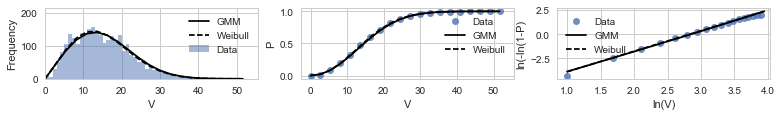

data size: 2785 weight 0.06501388986156827
GMM Weibull
R square 0.962861044335 0.966554431603
max diff: 0.0273539156376 0.011618207416 speed value: 13.5811770591 y gmm 0.447690967666
 
185.0 (175.0 - 195.0) degree


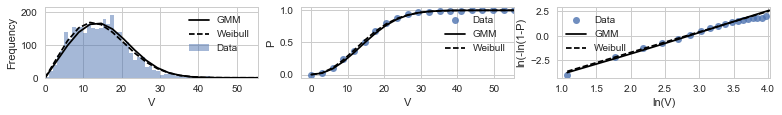

data size: 3167 weight 0.07393141443144945
GMM Weibull
R square 0.958033628295 0.962938576103
max diff: 0.0346332719828 0.0208085206308 speed value: 8.79044660118 y gmm 0.20186814892
 
205.0 (195.0 - 215.0) degree


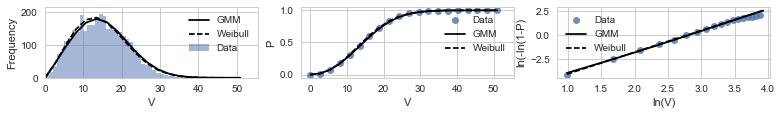

data size: 3267 weight 0.07626584494712516
GMM Weibull
R square 0.979094564633 0.97831312526
max diff: 0.0205864821705 0.0158315131682 speed value: 24.128904072 y gmm 0.894014068794
 
225.0 (215.0 - 235.0) degree


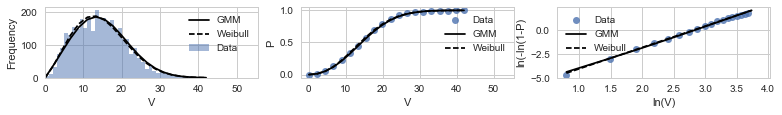

data size: 3333 weight 0.0778065690874711
GMM Weibull
R square 0.964590404495 0.966312414229
max diff: 0.0211554197155 0.012570348037 speed value: 22.1135423623 y gmm 0.848331528979
 
245.0 (235.0 - 255.0) degree


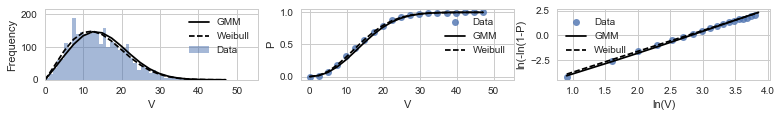

data size: 2665 weight 0.06221257324275743
GMM Weibull
R square 0.914993901479 0.939854356326
max diff: 0.0569422575117 0.0162155970646 speed value: 9.92334675023 y gmm 0.264633727479
 
265.0 (255.0 - 275.0) degree


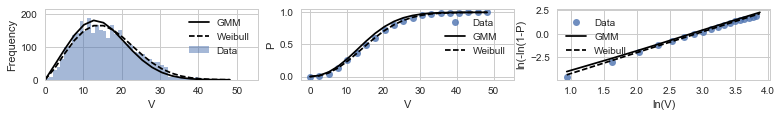

data size: 3307 weight 0.07719961715339543
GMM Weibull
R square 0.940035057548 0.964612475375
max diff: 0.0687645160349 0.0152361032027 speed value: 17.7710610997 y gmm 0.674147037958
 
285.0 (275.0 - 295.0) degree


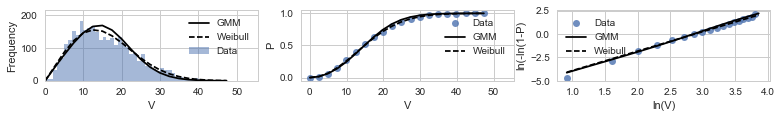

data size: 3132 weight 0.07311436375096295
GMM Weibull
R square 0.914507746694 0.955377748499
max diff: 0.0401535558668 0.0230855979406 speed value: 24.9260043061 y gmm 0.901264666978
 
305.0 (295.0 - 315.0) degree


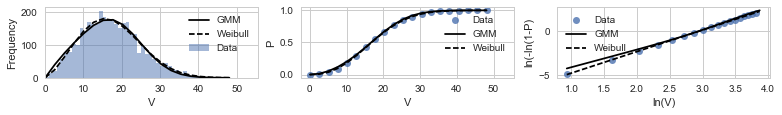

data size: 3596 weight 0.08394612134369821
GMM Weibull
R square 0.970666552391 0.979834476625
max diff: 0.0250892043483 0.0103076921297 speed value: 7.59343158689 y gmm 0.119638703792
 
325.0 (315.0 - 335.0) degree


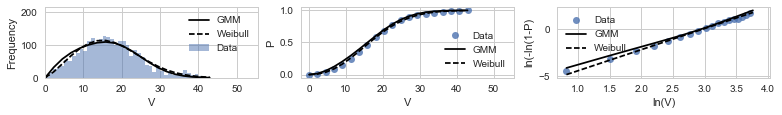

data size: 2358 weight 0.05504587155963303
GMM Weibull
R square 0.923940754423 0.947318526481
max diff: 0.0568137459508 0.0191630797884 speed value: 11.3045229025 y gmm 0.295575408377
 
345.0 (335.0 - 355.0) degree


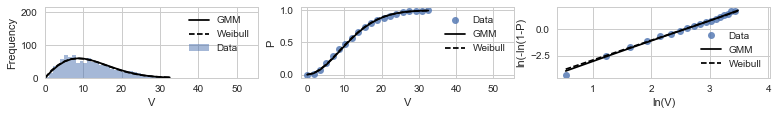

data size: 950 weight 0.02217708989891916
GMM Weibull
R square 0.906271690967 0.910789975965
max diff: 0.0446381685263 0.0341557665718 speed value: 8.56011445984 y gmm 0.354309199895
 
CPU times: user 1min 4s, sys: 1.16 s, total: 1min 5s
Wall time: 1min 4s


In [58]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9305778594645768 0.9493488698706563


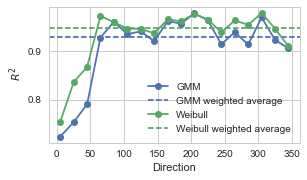

In [59]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print(gmm_mean, weibull_mean)

0.047404075768735746 0.02240185360973917


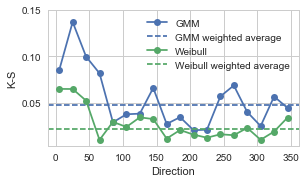

In [60]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print(gmm_mean, weibull_mean)

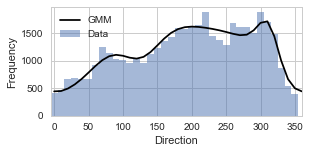

In [61]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [63]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution
0.137759877707 10.0 0.515800953153


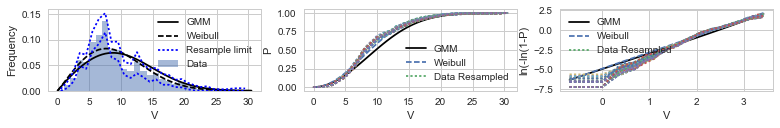

In [64]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print(diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()])

### 5.3.2 Time Variability

In [65]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/cqcn1991/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl4HNWV/v9W9apdslZrsy3ZAhxCACVDWOxMWCZAQsiX
xWYPSyBhkklIJmGAIYEQAh4M/OAJYLKMkwnJEAcCGTxgmBibZQwZbAcDZrGxbEuWZPUidbd6r/X3
R/uWqku9VHdXtUrS/TzwgNTq6ttbvXXOPec9jCzLMigUCoVCoeSEnekFUCgUCoUyG6CCSaFQKBSK
DqhgUigUCoWiAyqYFAqFQqHogAomhUKhUCg6oIJJoVAoFIoOqGBSKBQKhaIDKpgUCoVCoeiACiaF
QqFQKDqggkmhUCgUig6oYFIoFAqFogMqmBQKhUKh6IAKJoVCoVAoOqCCSaFQKBSKDqhgUigUCoWi
AyqYFAqFQikbhw4dwre//W2sWrUKV111FW644QZ8/PHH+NnPfoZjjjkGHo9H+dvx8XF84hOfwDPP
PIPh4WEcddRR+MUvfpF2vG984xu48sory7J2KpgUCoVCKQvxeBw33ngjrrnmGvzxj3/Eb3/7W3zr
W9/CXXfdBQBYvHgxNm3apPz9Cy+8gIULFyo/d3d346WXXlJ+DgQCGBwcLNv67WV7JAqFQqFYhh/8
4Ad46qmnDD3mxRdfjLVr12a9fevWrfjsZz+LE044Qfndcccdh9/+9rd45JFHcO655+LFF1/E1Vdf
rfz95z//eeVvGxoaUF9fj4GBAfT29mLTpk04++yzsWPHDkOfRzZohEmhUCiUsjA8PIzu7m7l5xtv
vBFXXnklzj77bIyNjaGpqQkVFRU4dOgQBgcH0dbWBpfLlXaML37xi3j++ecBAC+//DLOPPPMsq2f
RpgUCoUyD1m7dm3OaNAM2trasHv3buXndevWAQBWrVoFURQBTAmiIAg477zzsG3btrRjnHnmmbj8
8stxwQUXoLm5GW63u2zrpxEmhUKhUMrCGWecgTfffBO7du1Sfjc4OIixsTEwDAMA+MIXvoCXX34Z
O3bswEknnTTtGFVVVViyZAnWrl2LL33pS2VbO0AFk0KhUChloqqqCuvWrcN//Md/4IorrsAll1yC
2267Dbfeeiva29sBADU1NWhra8Py5cvBspkl6rzzzsPOnTtx8sknl3P5YGRZlsv6iBQKhUKhzEJo
hEmhUCgUig6oYFIoFAqFogNaJUuZl0iSBEEQwHEcbDYbWJaFzWaDzWZTig8oFApFDRVMyrxCkiSI
oghJkiDLsvJf9VY+y7JgWRYMw1AhpVAoClQwKfMCtVBmQi2GsiwrPWFESBmGAcMwkCQJ8Xgc9fX1
VEgplHkGFUzKnIakXostBtcKaTKZhM/nQ0VFhXI7iUTJf+12u/IzhUKZO9CiH8qcRBRFcBwHjuOK
FstMMAwDWZYVoQSmIlJBEJBMJhGNRhEOhxGJRBCLxRCPx5FMJiGKoqFroVBmG1/96lfx7rvvAgA4
jkN/fz9+9atfKbdfeeWV+PDDD6fd77XXXsOGDRswPDyMVatW6X68U089VTnuwMBAiaungkmZY4ii
iJGREYRCIUXYygkRUiKs+YSU4zgqpJR5w6mnnqoYpe/cuROnnXYaXn31VQBAMpnEyMgIjj766Gn3
W7lyJVavXl3WtWaCCiZlTkAiSp7nEYvFIAiCrvsVI6jFiFs2IU0kEohEIoqQxuNxJBIJKqSUsrB4
8fR/b721+NvzccoppyiC+eqrr+Liiy9GOBxGOBzG22+/jb/7u7/D9u3bcemll+KKK67ArbfeCp7n
8cwzz+D+++8HAExMTOAb3/gGLr74Yjz66KMAgFtuuQWvvfYagFQ0essttxT7kuSE7mFSZjWiKCrF
PFpRMgOjI1ZtapcIPancZRhGaXtRV+3SPVLKbGT58uXYv38/ZFnG9u3b8b3vfQ8nn3wy3njjDezZ
swennXYafvjDH+I///M/0djYiIceegjPPvss7PYpqYrFYli7di0qKytx+eWX44wzzijb+qlgUmYd
pB1EK5QEMwWzXKifkyRJSnWvumqXtL+Q1pjKyspprwWFkouDB829XQvLsjj66KPx2muvobm5GU6n
EytXrsQrr7yCjz76CJdffjl++MMf4qabbgIAJBIJnHLKKVi0aJFyjKOPPho1NTUAgE9+8pM4cOBA
2mOY+d2ngkmZNeQTSoLZEeZMirH6+RIhnZycRDQaRVtbW5qQkuiURKQUihU49dRT8fOf/xxf/OIX
AQD9/f147LHHAKQGRLe1teGxxx5DTU0NXn75ZVRWVuLw4cPK/QcGBhCNRuFyufDuu+9i9erVePPN
N+Hz+QAAH3zwgWlrp4JJsTxEKEl7SL4oSq+ozZVITB11AukRKcdxym1aIbXb7XPmNaDMHk455RTc
fvvtuO+++wAATqcTNTU1OOaYY8CyLP71X/8VN9xwA2RZRlVVFe677740wayrq8N3v/tdTExM4Nxz
z8XSpUtx8cUX47bbbsPGjRuxWM9mapHQaSUUy0KKY0jxi96T++joKFwuFxobG/P+LREUvfA8j6Gh
IfT29hZ0PzMJhUKIx+Noa2vTfZ9MqV2GYWC326kZA4WSBRphUixHJqEs5AQ+m4p+ZopMqV0gc0RK
7QEplBRUMCmWoVShJMz0PuNsJpOQql9Lks6lPruU+QgVTMqMI8sygsEgXC6Xkhos5QQ8l4t+ZgLt
e6H12QWoYT1lfkAFkzJjqCPK0dFRtLe3o7KysuTjzkdRmwnyGdYPDg5i0aJFSnERFVLKbIcKJqXs
ZEq9sixrqMjpPVYx4krFODdEDMl+aLbJLzQipcw2qGBSyobaEg5Ib843Mio086RLT+jFky8iBaan
dunkF4qVoIJJMR1iNkBOkGabDdCU7Myj7Q3NRS4hTSaTAJDVjIEKKaWcUMGkmIbalSdfH2W5BVMU
RYyPj2NychIOhwMulwtOpxMulytnQz8V4/KRTUh5nk9L5WvbX6iQUsyCCibFcDIJZb4TWLkEkwjl
+Pg4ampq0NzcrMzNDAaDSCaTkGUZTqdTEVAipmoDaEpuzBytlmkWKdkPVwuptv2FCimlVOgZgGIY
xQglwejITXssrVD29PTA5XKB53lUVFRM+9tkMgmO45BMJhGJRJBMJsEwDJxOJwAobTBOpxM2m82w
dc8VZnIWKXl89eQXcjvLsggEAmhsbEyzB6RCStEDFUxKyZQilASzIsxsQpkLm82GysrKtBYXcgLm
OA4jIyOIx+MIhULgOA42my0tpetyueBwOMpmeE5TxLlRfxZFUYTH40FtbS14nlduz7RHSoWUooUK
JqVo1EJJKPYEwzBM2nFKgQim1+stSCjzHdPhcMDhcACAMhlElmXwPJ8WjU5MTIDneTgcDkVEyX8d
Dse8OAnPRISph2zFSNSwnqIHKpiUgpEkCYFAALFYDC0tLYYc06g+TFEUMTk5iXA4DJZlSxbKTBCh
JBEI2e+srq5W/kaSJPA8r6R2JycnwXEcBEGYJqJkf5SeiM1Hj5AX4rNLDevnF1QwKbohxRVk1BYp
+TeCUlOy6tSr2+1GZWUlOjs7DVtfobAsq6Rn1UiSlLY/GovF0gqNtKldvfujVjtZWznCLCULQqCG
9fMTKpiUvKiFUu3SYlQKFSheMDPtUXIch/HxcVMft1hxZ1kWFRUV0wqNyP4oEdNwOAyO48AwzLRo
lHjuUgrHDCHXY1hPhXRuQAWTkpVMQkkwuqq10OPlKubhOM7UQhgzTnR2ux12uz1joRER0VgshmAw
CI7jYLfbFfEUBEFXr2s5sdJa1MiyXJaLjWx7pHTyy+yGCiZlGrmEkmBkkU4hx9NT9TpXzAW0hUYE
UmiUTCaVf3m

### 5.3.3 Adjacent Sector Variability

In [66]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [67]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

/Users/cqcn1991/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUHHWdPvxU9W16emZ67jOZWyYhCSGJWSFAwGiOLLC4
KMurS+ICAeUmcFwxeFYEVkA3qK+AigeBo/B6i64Q5GL8KfhqVi5CXhTDcgkESGaSzGRm+jLT93tX
1fvH8K18u6aqu6493TP1nJMDmUxVfbu7+vvU5/N5Ps+HEQRBgA0bNmzYsGGjLNj5XoANGzZs2LBR
D7AJ04YNGzZs2FABmzBt2LBhw4YNFbAJ04YNGzZs2FABmzBt2LBhw4YNFbAJ04YNGzZs2FABmzBt
2LBhw4YNFbAJ04YNGzZs2FABmzBt2LBhw4YNFbAJ04YNGzZs2FABmzBt2LBhw4YNFbAJ04YNGzZs
2FABmzBt2LBhw4YNFbAJ04YNGzZs2FABmzBt2LBhw4YNFbAJ04YNGzZsVA1jY2O44YYbsHXrVlx+
+eX43Oc+h/feew/33XcfTjrpJAQCAfF3p6ensXbtWjzxxBMYHx/HiSeeiB/96Ecl57vuuutw2WWX
VWXtNmHasGHDho2qIJPJ4Prrr8cVV1yBXbt24ec//zn+/d//Hf/1X/8FABgeHsbTTz8t/v7vf/97
LFmyRPz70NAQ/vCHP4h/j0QiOHLkSNXW76zalWzYsGHDRs3gy1/+Mh577DFTz7llyxbcfffdiv/+
5z//GWeccQZOPvlk8Wfr16/Hz3/+c/zgBz/A+eefj2eeeQaf/exnxd8/66yzxN9ta2tDa2srDh06
hBNOOAFPP/00Pvaxj+GVV14x9XUowY4wbdiwYcNGVTA+Po6hoSHx79dffz0uu+wyfOxjH8PU1BQ6
Ozvh9XoxNjaGI0eOoLe3Fx6Pp+QcH//4x/G73/0OALBnzx6cc845VVu/HWHasGHDxiLE3XffXTYa
tAK9vb148803xb8/+OCDAICtW7eC4zgAxwmxWCziggsuwIsvvlhyjnPOOQeXXnopPvWpT6GrqwsN
DQ1VW78dYdqwYcOGjarg7LPPxt69e/G///u/4s+OHDmCqakpMAwDADjvvPOwZ88evPLKK9i4ceOc
c/h8Pixbtgx33303PvGJT1Rt7YBNmDZs2LBho0rw+Xx48MEH8bOf/Qzbtm3Dv/3bv+HWW2/FLbfc
gr6+PgBAc3Mzent7sWbNGrCsPEVdcMEF+Pvf/44zzzyzmssHIwiCUNUr2rBhw4YNG3UIO8K0YcOG
DRs2VMAmTBs2bNiwYUMFbJWsjUUJnudRLBaRz+fhcDjAsiwcDgccDocoPrBhw4YNGjZh2lhU4Hke
HMeB53kIgiD+ly7lsywLlmXBMIxNpDZs2BBhE6aNRQGaKOVAk6EgCGJPGCFShmHAMAx4nkcmk0Fr
a6tNpDZsLDLYhGljQYOkXvWKwaVEmsvlEAqF4PV6xX8nkSj5r9PpFP9uw4aNhQNb9GNjQYLjOOTz
eeTzed1kKQeGYSAIgkiUwPGItFgsIpfLIZVKIZFIIJlMIp1OI5PJIJfLgeM4U9diw0a94TOf+Qxe
f/11AEA+n8eGDRvw8MMPi/9+2WWX4e23355z3PPPP49HH30U4+Pj2Lp1q+rrbdq0STzvoUOHDK7e
JkwbCwyEKAuFgkhs1QQhUkKslYg0n8/bRGpj0WDTpk2iUfrf//53fPjDH8Zzzz0HAMjlcjh27BhW
r14957jNmzfj05/+dFXXKgebMG0sCOglSj2EqofclIg0m80imUwikUhgZmYGExMTyGazNpHaqAqG
h+f+ueUW/f9eCR/60IdEwnzuueewZcsWJBIJJBIJvPrqqzj99NPxt7/9DRdffDG2bduGW265BYVC
AU888QTuueceAMDMzAyuu+46bNmyBffffz8A4Oabb8bzzz8PYDYavfnmm/W+JWVh1zBt1DU4jsPE
xASamprQ2NhoeURp9vnp1G6hUEA0GkVzc7Oo3GUYRmx7oVW7do3URj1izZo1GBkZgSAI+Nvf/oYv
felLOPPMM/HSSy/hnXfewYc//GHcdttt+O///m90dHTg3nvvxZNPPgmn8zhVpdNp3H333WhsbMSl
l16Ks88+u2rrtwnTRt2BtIMQ1Wsmk9E1sYAmpVoDTaQ8z4vqXlq1K21/cTqdJcfZsFEJhw9b++9S
sCyL1atX4/nnn0dXVxfcbjc2b96MZ599FgcOHMCll16K2267Ddu3bwcAZLNZfOhDH8LSpUvFc6xe
vRrNzc0AgA984AMYHR0tuYaVWRmbMG3UDaREKU1zajlPMplEMBhEJpOB2+2G2+2Gx+MR/+tyuWSJ
R+u1tKLSuek1qSFS0vqiZGJtw0a1sWnTJvzwhz/Exz/+cQDAhg0b8MADDwCYHRDd29uLBx54AM3N
zdizZw8aGxsxOTkpHn/o0CGkUil4PB68/vrr+PSnP429e/ciFAoBAN566y3L1m4Tpo2aByFK0h4i
jaLUkpggCEgkEggGgxAEAd3d3fB4PKKaNpfLIR6Pi4pWOSK1kiyNRIZKRJrP5wHMvvbp6WksWbJE
JFISkdqwUU186EMfwle/+lXcddddAAC3243m5macdNJJYFkW//mf/4nPfe5zEAQBPp8Pd911Vwlh
+v1+3HjjjZiZmcH555+PFStWYMuWLbj11lvx29/+FsNqiqk6YU8rsVGzIOIYIn5R2tzHx8fh8/nQ
1tameJ54PC4+gXZ3d6O5uRkMw4iEIgXP88jlciKRkv8SZ6CWlpYSIjXDwCCTySAUCpVMpDcLHMdh
dHQUK1asAKAckTqdTtuMwYYNBdgRpo2agxxRVtrA5Z77CFEGg0EwDFNClJXAsiy8Xq9oUECQy+Uw
NjaGhoYG5HI5JJNJ5HI5ACghUJpIawHS96dSREoTqW0PaMPGLGzCtFEz0EOUwNyUrCAIiMViCIVC
YFkWvb29aGpqMmWzJ6TR2to6Z90kCiWp3Xw+D4Zh5hCp2+2eFyJV+14SECKl31uSzrV9dm0sRtiE
aWPeQQiOkItWpSftuGMVUdLXkovWnE4nnE4nGhsbxZ8LgiBORMnlcshkMohGo+KEFCmRKvnczjek
75/UZxcAotEofD4fGhsbbSK1sWBhE6aNeQMdUUYiEXg8Hl3tIcBsb9b09DScTieWLFkCn88375s1
wzBwuVxwuVzw+XzizwVBQKFQEIk0lUphZmYGhUIBAHDs2LE5ZDrfr0UO9JrS6TScTifcbvccw3p7
8ouNhQKbMG1UHUqpV636M0EQEI1GEY1G4XA40N/fr5ko9V7XCBiGEVOzTU1N4s/T6TSCwSBaWlrE
+uj09DSKxSJcLpfq1pf5AlmL2skvNpHaqDfYhGmjaqAt4YDS5nwyOksNeJ5HNBpFKBQSJekej6eE
fKyClRs6eT+am5vFxmxg9vVqaX2RaxexWgyv5vyViBSYO4vUnvxio5ZgE6YNy0HMBsgGqdcQgCZK
j8eDgYEB+Hw+sa9yoYJlWTQ0NMxJV9OtL/l8HtFoVGx9kaZ0q2FcoJfUyhEpeT3BYBADAwNzzBhs
IrVRTdiEacMy0K48lSzoykWYPM8jEokgFAqhoaEBg4ODJeIaLdGpUVjt9KMFSq0vUsUuaX3heR5j
Y2M12/oiBX2/pFIpkUhpg3269cX22bVhNWzCtGE65Iiy0gbGsqy4IdLnIUTp9XoxNDRUQpQEtURi
RmDWJu9wOOYQaT6fx9jYGDo6OixpfbHSk1d6brlZpKQeThOptP3FJlIbRmETpg3TILdxaRmzRUiP
53nMzMwgHA7D6/Vi6dKlc6IoKapNmLVq2q4E8lk0NjZqan0hJEoTabV9adV+tlIiJbVy27Dehlmw
CdOGYZCI8tC

# 6. Result Variability & Cross-Validation

In [68]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.692  -6.123   -4.091  9.698  10.258  -0.169
2  0.184   2.370    9.162  6.493   6.863  -0.112
3  0.123  10.268  -13.299  6.799   6.221  -0.252

GMM Plot Result
0.692365302691 [[-6.12323665 -4.09101282]] [  9.05286334  10.83166618] -144.196346495
0.184231352929 [[ 2.37002663  9.16169958]] [ 6.24928862  7.08583546] -148.125204231
0.123403344381 [[ 10.26772189 -13.2991238 ]] [ 5.58186974  7.33233417] -125.278002136


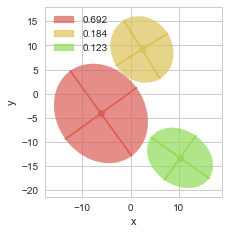

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.058  2.222432e-09      0.036       0.157

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.061  2.166763e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.692  -6.123   -4.091  9.698  10.258  -0.169
2  0.184   2.370    9.162  6.493   6.863  -0.112
3  0.123  10.268  -13.299  6.799   6.221  -0.252

GMM Plot Result
0.692365302691 [[-6.12323665 -4.09101282]] [  9.05286334  10.83166618] -144.196346495
0.184231352929 [[ 2.37002663  9.16169958]] [ 6.24928862  7.08583546] -148.125204231
0.123403344381 [[ 10.26772189 -13.2991238 ]] [ 5.58186974  7.33233417] -125.278002136


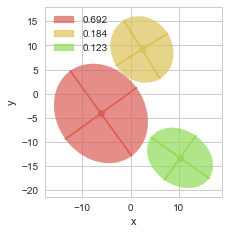

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.058  2.222432e-09      0.036       0.157

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.061  2.166763e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.692  -6.123   -4.091  9.698  10.258  -0.169
2  0.184   2.370    9.162  6.493   6.863  -0.112
3  0.123  10.268  -13.299  6.799   6.221  -0.252

GMM Plot Result
0.692365302691 [[-6.12323665 -4.09101282]] [  9.05286334  10.83166618] -144.196346495
0.184231352929 [[ 2.37002663  9.16169958]] [ 6.24928862  7.08583546] -148.125204231
0.123403344381 [[ 10.26772189 -13.2991238 ]] [ 5.58186974  7.33233417] -125.278002136


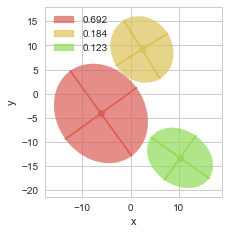

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.058  2.222432e-09      0.036       0.157

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.061  2.166763e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.692  -6.123   -4.091  9.698  10.258  -0.169
2  0.184   2.370    9.162  6.493   6.863  -0.112
3  0.123  10.268  -13.299  6.799   6.221  -0.252

GMM Plot Result
0.692365302691 [[-6.12323665 -4.09101282]] [  9.05286334  10.83166618] -144.196346495
0.184231352929 [[ 2.37002663  9.16169958]] [ 6.24928862  7.08583546] -148.125204231
0.123403344381 [[ 10.26772189 -13.2991238 ]] [ 5.58186974  7.33233417] -125.278002136


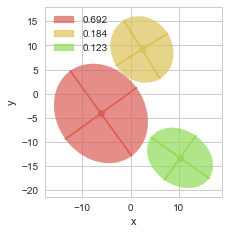

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.058  2.222432e-09      0.036       0.157

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.061  2.166763e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.668  -6.411   -4.439  9.816  10.295  -0.235
2  0.211   2.198    8.867  6.744   6.797  -0.143
3  0.122  10.222  -12.944  7.221   6.210  -0.326

GMM Plot Result
0.667504041774 [[-6.41130876 -4.43905458]] [  8.77412993  11.19670685] -140.739894872
0.210728419525 [[ 2.19835679  8.86718013]] [ 6.26611991  7.24050765] -136.555318477
0.121767538701 [[ 10.22155951 -12.94383183]] [ 5.40703623  7.84012228] -122.544482371


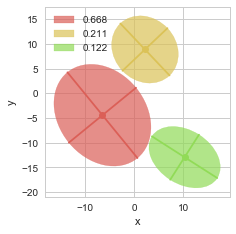

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.015      0.112  1.980831e-09      0.035       0.148

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.073  2.147940e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.668  -6.411   -4.439  9.816  10.295  -0.235
2  0.211   2.198    8.867  6.744   6.797  -0.143
3  0.122  10.222  -12.944  7.221   6.210  -0.326

GMM Plot Result
0.667504041774 [[-6.41130876 -4.43905458]] [  8.77412993  11.19670685] -140.739894872
0.210728419525 [[ 2.19835679  8.86718013]] [ 6.26611991  7.24050765] -136.555318477
0.121767538701 [[ 10.22155951 -12.94383183]] [ 5.40703623  7.84012228] -122.544482371


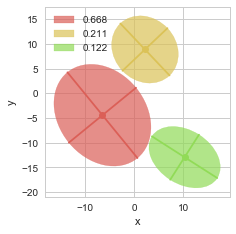

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.015      0.112  1.980831e-09      0.035       0.148

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.073  2.147940e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.668  -6.411   -4.439  9.816  10.295  -0.235
2  0.211   2.198    8.867  6.744   6.797  -0.143
3  0.122  10.222  -12.944  7.221   6.210  -0.326

GMM Plot Result
0.667504041774 [[-6.41130876 -4.43905458]] [  8.77412993  11.19670685] -140.739894872
0.210728419525 [[ 2.19835679  8.86718013]] [ 6.26611991  7.24050765] -136.555318477
0.121767538701 [[ 10.22155951 -12.94383183]] [ 5.40703623  7.84012228] -122.544482371


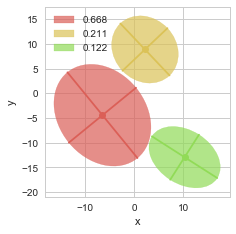

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.015      0.112  1.980831e-09      0.035       0.148

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.073  2.147940e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.668  -6.411   -4.439  9.816  10.295  -0.235
2  0.211   2.198    8.867  6.744   6.797  -0.143
3  0.122  10.222  -12.944  7.221   6.210  -0.326

GMM Plot Result
0.667504041774 [[-6.41130876 -4.43905458]] [  8.77412993  11.19670685] -140.739894872
0.210728419525 [[ 2.19835679  8.86718013]] [ 6.26611991  7.24050765] -136.555318477
0.121767538701 [[ 10.22155951 -12.94383183]] [ 5.40703623  7.84012228] -122.544482371


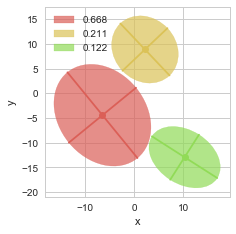

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.015      0.112  1.980831e-09      0.035       0.148

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.073  2.147940e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.630  -7.117   -4.074  9.289  10.184  -0.191
2  0.209   2.059    8.977  6.715   6.814  -0.111
3  0.161   9.460  -12.585  7.350   7.042  -0.268

GMM Plot Result
0.629957766762 [[-7.11701006 -4.0736636 ]] [  8.65775763  10.7261772 ] -147.882448231
0.208989815159 [[ 2.05914752  8.97719761]] [ 6.37592474  7.13272525] -138.78338358
0.161052418079 [[  9.4597711  -12.58454934]] [ 6.14487422  8.11498892] -130.474843541


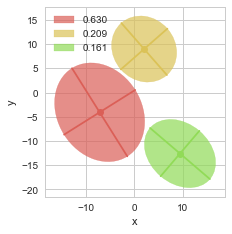

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.070  2.191578e-09      0.037       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.062  2.166911e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.630  -7.117   -4.074  9.289  10.184  -0.191
2  0.209   2.059    8.977  6.715   6.814  -0.111
3  0.161   9.460  -12.585  7.350   7.042  -0.268

GMM Plot Result
0.629957766762 [[-7.11701006 -4.0736636 ]] [  8.65775763  10.7261772 ] -147.882448231
0.208989815159 [[ 2.05914752  8.97719761]] [ 6.37592474  7.13272525] -138.78338358
0.161052418079 [[  9.4597711  -12.58454934]] [ 6.14487422  8.11498892] -130.474843541


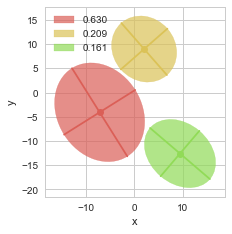

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.070  2.191578e-09      0.037       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.062  2.166911e-09      0.036       0.155


CPU times: user 3.75 s, sys: 183 ms, total: 3.93 s
Wall time: 41.5 s


In [69]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 6.2 Cross-validation, to select the number of Gaussian

In [70]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32127.75 10709.25
  
Number of gaussian 1


/Users/cqcn1991/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.076034  0.021093  8.441032e-09    0.071421     0.306239  0.921884
1    0.076641  0.021928  8.137325e-09    0.068926     0.300635  0.924496
2    0.075429  0.020269  8.249363e-09    0.071410     0.302603  0.923985
3    0.077731  0.021992  8.387663e-09    0.071314     0.305156  0.922966

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.085941  0.027990  8.665739e-09    0.072039     0.309984  0.921020
1    0.077528  0.025422  9.087310e-09    0.076325     0.317575  0.917652
2    0.085225  0.023533  9.016339e-09    0.068399     0.316630  0.916636
3    0.080530  0.023038  8.677996e-09    0.071251     0.310550  0.919009

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.033640  0.011480  2.683823e-09    0.040008     0.172633  0.975031
1    0.031415  0.011474  2.721476e-09    0.040768     0.173701  0.974685
2    0.035527  0.010670  2.879255e-09    0.041893     0.178852  0.973591
3    0.035010  0.010526  2.772799e-09    0.040630     0.175583  0.974600

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036651  0.010109  3.614507e-09    0.047111     0.200358  0.967506
1    0.045116  0.014827  3.322139e-09    0.043700     0.192547  0.970069
2    0.032011  0.015059  3.038503e-09    0.041824     0.183567  0.971500
3    0.048654  0.013050  3.235175e-09    0.045011     0.189193  0.969498

  
Number of gaussian 3


Process ForkPoolWorker-21:
Process ForkPoolWorker-23:
Traceback (most recent call last):
  File "/Users/cqcn1991/anaconda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/cqcn1991/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/cqcn1991/anaconda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/cqcn1991/anaconda/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/cqcn1991/anaconda/lib/python3.6/site-packages/joblib/pool.py", line 360, in get
    racquire()
  File "/Users/cqcn1991/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/cqcn1991/anaconda/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
  File "/Users/cqcn199

KeyboardInterrupt: 

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

In [ ]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)